In [1]:
import numpy  as np
import pandas as pd
import json
import pandas

In [2]:
import nltk
import nltk.corpus
from sklearn.feature_extraction.text  import TfidfVectorizer
from sklearn.metrics                  import silhouette_samples, silhouette_score
from sklearn.preprocessing            import normalize
from nltk.tokenize                    import word_tokenize
import re
from unidecode                        import unidecode
from nltk.corpus import stopwords

In [3]:
import matplotlib.pyplot  as plt
import matplotlib.cm      as cm
import seaborn            as sns
from sklearn.metrics                  import silhouette_samples, silhouette_score
from wordcloud                        import WordCloud

In [4]:
from sklearn import cluster

In [5]:
Proverbios_1 = "The proverbs of Solomon the son of David, king of Israel;To know wisdom and instruction; to perceive the words of understanding;To receive the instruction of wisdom, justice, and judgment, and equity;To give subtlety to the simple, to the young man knowledge and discretion.A wise man will hear, and will increase learning; and a man of understanding shall attain to wise counsels:To understand a proverb, and the interpretation; the words of the wise, and their dark sayings.The fear of the LORD is the beginning of knowledge: but fools despise wisdom and instruction.My son, hear the instruction of your father, and forsake not the law of your mother:For they shall be an ornament of grace to your head, and chains about your neck.My son, if sinners entice you, consent you not.If they say, Come with us, let us lay wait for blood, let us lurk privately for the innocent without cause:Let us swallow them up alive as the grave; and whole, as those that go down into the pit:We shall find all precious substance, we shall fill our houses with spoil:Cast in your lot among us; let us all have one purse:My son, walk not you in the way with them; refrain your foot from their path:For their feet run to evil, and make haste to shed blood.Surely in vain the net is spread in the sight of any bird.And they lay wait for their own blood; they lurk privately for their own lives.So are the ways of every one that is greedy of gain; which takes away the life of the owners thereof.Wisdom cries without; she utters her voice in the streets:She cries in the chief place of concourse, in the openings of the gates: in the city she utters her words, saying,How long, you simple ones, will you love simplicity? and the scorners delight in their scorning, and fools hate knowledge?Turn you at my reproof: behold, I will pour out my spirit to you, I will make known my words to you.Because I have called, and you refused; I have stretched out my hand, and no man regarded;But you have set at nothing all my counsel, and would none of my reproof:I also will laugh at your calamity; I will mock when your fear comes;When your fear comes as desolation, and your destruction comes as a whirlwind; when distress and anguish comes on you.Then shall they call on me, but I will not answer; they shall seek me early, but they shall not find me:For that they hated knowledge, and did not choose the fear of the LORD:They would none of my counsel: they despised all my reproof.Therefore shall they eat of the fruit of their own way, and be filled with their own devices.For the turning away of the simple shall slay them, and the prosperity of fools shall destroy them.But whoever listens to me shall dwell safely, and shall be quiet from fear of evil.".lower()

In [6]:
Proverbios_2 = "My son, if you will receive my words, and hide my commandments with you;So that you incline your ear to wisdom, and apply your heart to understanding;Yes, if you cry after knowledge, and lift up your voice for understanding;If you seek her as silver, and search for her as for hid treasures;Then shall you understand the fear of the LORD, and find the knowledge of God.For the LORD gives wisdom: out of his mouth comes knowledge and understanding.He lays up sound wisdom for the righteous: he is a buckler to them that walk uprightly.He keeps the paths of judgment, and preserves the way of his saints.Then shall you understand righteousness, and judgment, and equity; yes, every good path.When wisdom enters into your heart, and knowledge is pleasant to your soul;Discretion shall preserve you, understanding shall keep you:To deliver you from the way of the evil man, from the man that speaks fraudulent things;Who leave the paths of uprightness, to walk in the ways of darkness;Who rejoice to do evil, and delight in the frowardness of the wicked;Whose ways are crooked, and they fraudulent in their paths:To deliver you from the strange woman, even from the stranger which flatters with her words;Which forsakes the guide of her youth, and forgets the covenant of her God.For her house inclines to death, and her paths to the dead.None that go to her return again, neither take they hold of the paths of life.That you may walk in the way of good men, and keep the paths of the righteous.For the upright shall dwell in the land, and the perfect shall remain in it.But the wicked shall be cut off from the earth, and the transgressors shall be rooted out of it.".lower()

In [8]:
Proverbios_3 = "My son, forget not my law; but let your heart keep my commandments:For length of days, and long life, and peace, shall they add to you.Let not mercy and truth forsake you: bind them about your neck; write them on the table of your heart:So shall you find favor and good understanding in the sight of God and man.Trust in the LORD with all your heart; and lean not to your own understanding.In all your ways acknowledge him, and he shall direct your paths.Be not wise in your own eyes: fear the LORD, and depart from evil.It shall be health to your navel, and marrow to your bones.Honor the LORD with your substance, and with the first fruits of all your increase:So shall your barns be filled with plenty, and your presses shall burst out with new wine.My son, despise not the chastening of the LORD; neither be weary of his correction:For whom the LORD loves he corrects; even as a father the son in whom he delights.Happy is the man that finds wisdom, and the man that gets understanding.For the merchandise of it is better than the merchandise of silver, and the gain thereof than fine gold.She is more precious than rubies: and all the things you can desire are not to be compared to her.Length of days is in her right hand; and in her left hand riches and honor.Her ways are ways of pleasantness, and all her paths are peace.She is a tree of life to them that lay hold on her: and happy is every one that retains her.The LORD by wisdom has founded the earth; by understanding has he established the heavens.By his knowledge the depths are broken up, and the clouds drop down the dew.My son, let not them depart from your eyes: keep sound wisdom and discretion:So shall they be life to your soul, and grace to your neck.Then shall you walk in your way safely, and your foot shall not stumble.When you lie down, you shall not be afraid: yes, you shall lie down, and your sleep shall be sweet.Be not afraid of sudden fear, neither of the desolation of the wicked, when it comes.For the LORD shall be your confidence, and shall keep your foot from being taken.Withhold not good from them to whom it is due, when it is in the power of your hand to do it.Say not to your neighbor, Go, and come again, and to morrow I will give; when you have it by you.Devise not evil against your neighbor, seeing he dwells securely by you.Strive not with a man without cause, if he have done you no harm.Envy you not the oppressor, and choose none of his ways.For the fraudulent is abomination to the LORD: but his secret is with the righteous.The curse of the LORD is in the house of the wicked: but he blesses the habitation of the just.Surely he scorns the scorners: but he gives grace to the lowly.The wise shall inherit glory: but shame shall be the promotion of fools.".lower()

In [9]:
Proverbios_4 = "Hear, you children, the instruction of a father, and attend to know understanding.For I give you good doctrine, forsake you not my law.For I was my father' son, tender and only beloved in the sight of my mother.He taught me also, and said to me, Let your heart retain my words: keep my commandments, and live.Get wisdom, get understanding: forget it not; neither decline from the words of my mouth.Forsake her not, and she shall preserve you: love her, and she shall keep you.Wisdom is the principal thing; therefore get wisdom: and with all your getting get understanding.Exalt her, and she shall promote you: she shall bring you to honor, when you do embrace her.She shall give to your head an ornament of grace: a crown of glory shall she deliver to you.Hear, O my son, and receive my sayings; and the years of your life shall be many.I have taught you in the way of wisdom; I have led you in right paths.When you go, your steps shall not be straitened; and when you run, you shall not stumble.Take fast hold of instruction; let her not go: keep her; for she is your life.Enter not into the path of the wicked, and go not in the way of evil men.Avoid it, pass not by it, turn from it, and pass away.For they sleep not, except they have done mischief; and their sleep is taken away, unless they cause some to fall.For they eat the bread of wickedness, and drink the wine of violence.But the path of the just is as the shining light, that shines more and more to the perfect day.The way of the wicked is as darkness: they know not at what they stumble.My son, attend to my words; incline your ear to my sayings.Let them not depart from your eyes; keep them in the middle of your heart.For they are life to those that find them, and health to all their flesh.Keep your heart with all diligence; for out of it are the issues of life.Put away from you a fraudulent mouth, and perverse lips put far from you.Let your eyes look right on, and let your eyelids look straight before you.Ponder the path of your feet, and let all your ways be established.Turn not to the right hand nor to the left: remove your foot from evil.".lower()

In [10]:
Proverbios_5 = "My son, attend to my wisdom, and bow your ear to my understanding:That you may regard discretion, and that your lips may keep knowledge.For the lips of a strange woman drop as an honeycomb, and her mouth is smoother than oil:But her end is bitter as wormwood, sharp as a two-edged sword.Her feet go down to death; her steps take hold on hell.Lest you should ponder the path of life, her ways are moveable, that you can not know them.Hear me now therefore, O you children, and depart not from the words of my mouth.Remove your way far from her, and come not near the door of her house:Lest you give your honor to others, and your years to the cruel:Lest strangers be filled with your wealth; and your labors be in the house of a stranger;And you mourn at the last, when your flesh and your body are consumed,And say, How have I hated instruction, and my heart despised reproof;And have not obeyed the voice of my teachers, nor inclined my ear to them that instructed me!I was almost in all evil in the middle of the congregation and assembly.Drink waters out of your own cistern, and running waters out of your own well.Let your fountains be dispersed abroad, and rivers of waters in the streets.Let them be only your own, and not strangers'with you.Let your fountain be blessed: and rejoice with the wife of your youth.Let her be as the loving hind and pleasant roe; let her breasts satisfy you at all times; and be you ravished always with her love.And why will you, my son, be ravished with a strange woman, and embrace the bosom of a stranger?For the ways of man are before the eyes of the LORD, and he ponders all his goings.His own iniquities shall take the wicked himself, and he shall be held with the cords of his sins.He shall die without instruction; and in the greatness of his folly he shall go astray.".lower()

In [11]:
Proverbios_6 = "My son, if you be surety for your friend, if you have stricken your hand with a stranger,You are snared with the words of your mouth, you are taken with the words of your mouth.Do this now, my son, and deliver yourself, when you are come into the hand of your friend; go, humble yourself, and make sure your friend.Give not sleep to your eyes, nor slumber to your eyelids.Deliver yourself as a roe from the hand of the hunter, and as a bird from the hand of the fowler.Go to the ant, you sluggard; consider her ways, and be wise:Which having no guide, overseer, or ruler,Provides her meat in the summer, and gathers her food in the harvest.How long will you sleep, O sluggard? when will you arise out of your sleep?Yet a little sleep, a little slumber, a little folding of the hands to sleep:So shall your poverty come as one that travels, and your want as an armed man.A naughty person, a wicked man, walks with a fraudulent mouth.He winks with his eyes, he speaks with his feet, he teaches with his fingers;Frowardness is in his heart, he devises mischief continually; he sows discord.Therefore shall his calamity come suddenly; suddenly shall he be broken without remedy.These six things does the LORD hate: yes, seven are an abomination to him:A proud look, a lying tongue, and hands that shed innocent blood,An heart that devises wicked imaginations, feet that be swift in running to mischief,A false witness that speaks lies, and he that sows discord among brothers.My son, keep your father' commandment, and forsake not the law of your mother:Bind them continually on your heart, and tie them about your neck.When you go, it shall lead you; when you sleep, it shall keep you; and when you wake, it shall talk with you.For the commandment is a lamp; and the law is light; and reproofs of instruction are the way of life:To keep you from the evil woman, from the flattery of the tongue of a strange woman.Lust not after her beauty in your heart; neither let her take you with her eyelids.For by means of a whorish woman a man is brought to a piece of bread: and the adulteress will hunt for the precious life.Can a man take fire in his bosom, and his clothes not be burned?Can one go on hot coals, and his feet not be burned?So he that goes in to his neighbor' wife; whoever touches her shall not be innocent.Men do not despise a thief, if he steal to satisfy his soul when he is hungry;But if he be found, he shall restore sevenfold; he shall give all the substance of his house.But whoever commits adultery with a woman lacks understanding: he that does it destroys his own soul.A wound and dishonor shall he get; and his reproach shall not be wiped away.For jealousy is the rage of a man: therefore he will not spare in the day of vengeance.He will not regard any ransom; neither will he rest content, though you give many gifts.".lower()

In [12]:
Proverbios_7 = "My son, keep my words, and lay up my commandments with you.Keep my commandments, and live; and my law as the apple of your eye.Bind them on your fingers, write them on the table of your heart.Say to wisdom, You are my sister; and call understanding your kinswoman:That they may keep you from the strange woman, from the stranger which flatters with her words.For at the window of my house I looked through my casement,And beheld among the simple ones, I discerned among the youths, a young man void of understanding,Passing through the street near her corner; and he went the way to her house,In the twilight, in the evening, in the black and dark night:And, behold, there met him a woman with the attire of an harlot, and subtle of heart.(She is loud and stubborn; her feet abide not in her house:Now is she without, now in the streets, and lies in wait at every corner.)So she caught him, and kissed him, and with an impudent face said to him,I have peace offerings with me; this day have I paid my vows.Therefore came I forth to meet you, diligently to seek your face, and I have found you.I have decked my bed with coverings of tapestry, with carved works, with fine linen of Egypt.I have perfumed my bed with myrrh, aloes, and cinnamon.Come, let us take our fill of love until the morning: let us solace ourselves with loves.For the manager is not at home, he is gone a long journey:He has taken a bag of money with him, and will come home at the day appointed.With her much fair speech she caused him to yield, with the flattering of her lips she forced him.He goes after her straightway, as an ox goes to the slaughter, or as a fool to the correction of the stocks;Till a dart strike through his liver; as a bird hastens to the snare, and knows not that it is for his life.Listen to me now therefore, O you children, and attend to the words of my mouth.Let not your heart decline to her ways, go not astray in her paths.For she has cast down many wounded: yes, many strong men have been slain by her.Her house is the way to hell, going down to the chambers of death.".lower()

In [13]:
Proverbios_8 = "Does not wisdom cry? and understanding put forth her voice?She stands in the top of high places, by the way in the places of the paths.She cries at the gates, at the entry of the city, at the coming in at the doors.To you, O men, I call; and my voice is to the sons of man.O you simple, understand wisdom: and, you fools, be you of an understanding heart.Hear; for I will speak of excellent things; and the opening of my lips shall be right things.For my mouth shall speak truth; and wickedness is an abomination to my lips.All the words of my mouth are in righteousness; there is nothing fraudulent or perverse in them.They are all plain to him that understands, and right to them that find knowledge.Receive my instruction, and not silver; and knowledge rather than choice gold.For wisdom is better than rubies; and all the things that may be desired are not to be compared to it.I wisdom dwell with prudence, and find out knowledge of witty inventions.The fear of the LORD is to hate evil: pride, and arrogance, and the evil way, and the fraudulent mouth, do I hate.Counsel is mine, and sound wisdom: I am understanding; I have strength.By me kings reign, and princes decree justice.By me princes rule, and nobles, even all the judges of the earth.I love them that love me; and those that seek me early shall find me.Riches and honor are with me; yes, durable riches and righteousness.My fruit is better than gold, yes, than fine gold; and my revenue than choice silver.I lead in the way of righteousness, in the middle of the paths of judgment:That I may cause those that love me to inherit substance; and I will fill their treasures.The LORD possessed me in the beginning of his way, before his works of old.I was set up from everlasting, from the beginning, or ever the earth was.When there were no depths, I was brought forth; when there were no fountains abounding with water.Before the mountains were settled, before the hills was I brought forth:While as yet he had not made the earth, nor the fields, nor the highest part of the dust of the world.When he prepared the heavens, I was there: when he set a compass on the face of the depth:When he established the clouds above: when he strengthened the fountains of the deep:When he gave to the sea his decree, that the waters should not pass his commandment: when he appointed the foundations of the earth:Then I was by him, as one brought up with him: and I was daily his delight, rejoicing always before him;Rejoicing in the habitable part of his earth; and my delights were with the sons of men.Now therefore listen to me, O you children: for blessed are they that keep my ways.Hear instruction, and be wise, and refuse it not.Blessed is the man that hears me, watching daily at my gates, waiting at the posts of my doors.For whoever finds me finds life, and shall obtain favor of the LORD.But he that sins against me wrongs his own soul: all they that hate me love death.".lower()

In [14]:
Proverbios_9 = "Wisdom has built her house, she has hewn out her seven pillars:She has killed her beasts; she has mingled her wine; she has also furnished her table.She has sent forth her maidens: she cries on the highest places of the city,Whoever is simple, let him turn in here: as for him that wants understanding, she said to him,Come, eat of my bread, and drink of the wine which I have mingled.Forsake the foolish, and live; and go in the way of understanding.He that reproves a scorner gets to himself shame: and he that rebukes a wicked man gets himself a blot.Reprove not a scorner, lest he hate you: rebuke a wise man, and he will love you.Give instruction to a wise man, and he will be yet wiser: teach a just man, and he will increase in learning.The fear of the LORD is the beginning of wisdom: and the knowledge of the holy is understanding.For by me your days shall be multiplied, and the years of your life shall be increased.If you be wise, you shall be wise for yourself: but if you scorn, you alone shall bear it.A foolish woman is clamorous: she is simple, and knows nothing.For she sits at the door of her house, on a seat in the high places of the city,To call passengers who go right on their ways:Whoever is simple, let him turn in here: and as for him that wants understanding, she said to him,Stolen waters are sweet, and bread eaten in secret is pleasant.But he knows not that the dead are there; and that her guests are in the depths of hell.".lower()

In [15]:
Proverbios_10 = "The proverbs of Solomon. A wise son makes a glad father: but a foolish son is the heaviness of his mother.Treasures of wickedness profit nothing: but righteousness delivers from death.The LORD will not suffer the soul of the righteous to famish: but he casts away the substance of the wicked.He becomes poor that deals with a slack hand: but the hand of the diligent makes rich.He that gathers in summer is a wise son: but he that sleeps in harvest is a son that causes shame.Blessings are on the head of the just: but violence covers the mouth of the wicked.The memory of the just is blessed: but the name of the wicked shall rot.The wise in heart will receive commandments: but a prating fool shall fall.He that walks uprightly walks surely: but he that perverts his ways shall be known.He that winks with the eye causes sorrow: but a prating fool shall fall.The mouth of a righteous man is a well of life: but violence covers the mouth of the wicked.Hatred stirs up strifes: but love covers all sins.In the lips of him that has understanding wisdom is found: but a rod is for the back of him that is void of understanding.Wise men lay up knowledge: but the mouth of the foolish is near destruction.The rich man' wealth is his strong city: the destruction of the poor is their poverty.The labor of the righteous tends to life: the fruit of the wicked to sin.He is in the way of life that keeps instruction: but he that refuses reproof errs.He that hides hatred with lying lips, and he that utters a slander, is a fool.In the multitude of words there wants not sin: but he that refrains his lips is wise.The tongue of the just is as choice silver: the heart of the wicked is little worth.The lips of the righteous feed many: but fools die for want of wisdom.The blessing of the LORD, it makes rich, and he adds no sorrow with it.It is as sport to a fool to do mischief: but a man of understanding has wisdom.The fear of the wicked, it shall come on him: but the desire of the righteous shall be granted.As the whirlwind passes, so is the wicked no more: but the righteous is an everlasting foundation.As vinegar to the teeth, and as smoke to the eyes, so is the sluggard to them that send him.The fear of the LORD prolongs days: but the years of the wicked shall be shortened.The hope of the righteous shall be gladness: but the expectation of the wicked shall perish.The way of the LORD is strength to the upright: but destruction shall be to the workers of iniquity.The righteous shall never be removed: but the wicked shall not inhabit the earth.The mouth of the just brings forth wisdom: but the fraudulent tongue shall be cut out.The lips of the righteous know what is acceptable: but the mouth of the wicked speaks frowardness.".lower()

In [16]:
Proverbios_11 = "A false balance is abomination to the LORD: but a just weight is his delight.When pride comes, then comes shame: but with the lowly is wisdom.The integrity of the upright shall guide them: but the perverseness of transgressors shall destroy them.Riches profit not in the day of wrath: but righteousness delivers from death.The righteousness of the perfect shall direct his way: but the wicked shall fall by his own wickedness.The righteousness of the upright shall deliver them: but transgressors shall be taken in their own naughtiness.When a wicked man dies, his expectation shall perish: and the hope of unjust men perishes.The righteous is delivered out of trouble, and the wicked comes in his stead.An hypocrite with his mouth destroys his neighbor: but through knowledge shall the just be delivered.When it goes well with the righteous, the city rejoices: and when the wicked perish, there is shouting.By the blessing of the upright the city is exalted: but it is overthrown by the mouth of the wicked.He that is void of wisdom despises his neighbor: but a man of understanding holds his peace.A talebearer reveals secrets: but he that is of a faithful spirit conceals the matter.Where no counsel is, the people fall: but in the multitude of counsellors there is safety.He that is surety for a stranger shall smart for it: and he that hates indebtedness is sure.A gracious woman retains honor: and strong men retain riches.The merciful man does good to his own soul: but he that is cruel troubles his own flesh.The wicked works a deceitful work: but to him that sows righteousness shall be a sure reward.As righteousness tends to life: so he that pursues evil pursues it to his own death.They that are of a fraudulent heart are abomination to the LORD: but such as are upright in their way are his delight.Though hand join in hand, the wicked shall not be unpunished: but the seed of the righteous shall be delivered.As a jewel of gold in a swine' snout, so is a fair woman which is without discretion.The desire of the righteous is only good: but the expectation of the wicked is wrath.There is that scatters, and yet increases; and there is that withholds more than is meet, but it tends to poverty.The liberal soul shall be made fat: and he that waters shall be watered also himself.He that withholds corn, the people shall curse him: but blessing shall be on the head of him that sells it.He that diligently seeks good procures favor: but he that seeks mischief, it shall come to him.He that trusts in his riches shall fall; but the righteous shall flourish as a branch.He that troubles his own house shall inherit the wind: and the fool shall be servant to the wise of heart.The fruit of the righteous is a tree of life; and he that wins souls is wise.Behold, the righteous shall be recompensed in the earth: much more the wicked and the sinner.".lower()

In [17]:
Proverbios_12 = "Whoever loves instruction loves knowledge: but he that hates reproof is brutish.A good man obtains favor of the LORD: but a man of wicked devices will he condemn.A man shall not be established by wickedness: but the root of the righteous shall not be moved.A virtuous woman is a crown to her husband: but she that makes ashamed is as rottenness in his bones.The thoughts of the righteous are right: but the counsels of the wicked are deceit.The words of the wicked are to lie in wait for blood: but the mouth of the upright shall deliver them.The wicked are overthrown, and are not: but the house of the righteous shall stand.A man shall be commended according to his wisdom: but he that is of a perverse heart shall be despised.He that is despised, and has a servant, is better than he that honors himself, and lacks bread.A righteous man regards the life of his beast: but the tender mercies of the wicked are cruel.He that tills his land shall be satisfied with bread: but he that follows vain persons is void of understanding.The wicked desires the net of evil men: but the root of the righteous yields fruit.The wicked is snared by the transgression of his lips: but the just shall come out of trouble.A man shall be satisfied with good by the fruit of his mouth: and the recompense of a man' hands shall be rendered to him.The way of a fool is right in his own eyes: but he that listens to counsel is wise.A fool' wrath is presently known: but a prudent man covers shame.He that speaks truth shows forth righteousness: but a false witness deceit.There is that speaks like the piercings of a sword: but the tongue of the wise is health.The lip of truth shall be established for ever: but a lying tongue is but for a moment.Deceit is in the heart of them that imagine evil: but to the counsellors of peace is joy.There shall no evil happen to the just: but the wicked shall be filled with mischief.Lying lips are abomination to the LORD: but they that deal truly are his delight.A prudent man conceals knowledge: but the heart of fools proclaims foolishness.The hand of the diligent shall bear rule: but the slothful shall be under tribute.Heaviness in the heart of man makes it stoop: but a good word makes it glad.The righteous is more excellent than his neighbor: but the way of the wicked seduces them.The slothful man roasts not that which he took in hunting: but the substance of a diligent man is precious.In the way of righteousness is life: and in the pathway thereof there is no death.".lower()

In [18]:
Proverbios_13 = "A wise son hears his father' instruction: but a scorner hears not rebuke.A man shall eat good by the fruit of his mouth: but the soul of the transgressors shall eat violence.He that keeps his mouth keeps his life: but he that opens wide his lips shall have destruction.The soul of the sluggard desires, and has nothing: but the soul of the diligent shall be made fat.A righteous man hates lying: but a wicked man is loathsome, and comes to shame.Righteousness keeps him that is upright in the way: but wickedness overthrows the sinner.There is that makes himself rich, yet has nothing: there is that makes himself poor, yet has great riches.The ransom of a man' life are his riches: but the poor hears not rebuke.The light of the righteous rejoices: but the lamp of the wicked shall be put out.Only by pride comes contention: but with the well advised is wisdom.Wealth gotten by vanity shall be diminished: but he that gathers by labor shall increase.Hope deferred makes the heart sick: but when the desire comes, it is a tree of life.Whoever despises the word shall be destroyed: but he that fears the commandment shall be rewarded.The law of the wise is a fountain of life, to depart from the snares of death.Good understanding gives favor: but the way of transgressors is hard.Every prudent man deals with knowledge: but a fool lays open his folly.A wicked messenger falls into mischief: but a faithful ambassador is health.Poverty and shame shall be to him that refuses instruction: but he that regards reproof shall be honored.The desire accomplished is sweet to the soul: but it is abomination to fools to depart from evil.He that walks with wise men shall be wise: but a companion of fools shall be destroyed.Evil pursues sinners: but to the righteous good shall be repaid.A good man leaves an inheritance to his children' children: and the wealth of the sinner is laid up for the just.Much food is in the tillage of the poor: but there is that is destroyed for want of judgment.He that spares his rod hates his son: but he that loves him chastens him betimes.The righteous eats to the satisfying of his soul: but the belly of the wicked shall want.".lower()

In [19]:
Proverbios_14 = "Every wise woman builds her house: but the foolish plucks it down with her hands.He that walks in his uprightness fears the LORD: but he that is perverse in his ways despises him.In the mouth of the foolish is a rod of pride: but the lips of the wise shall preserve them.Where no oxen are, the crib is clean: but much increase is by the strength of the ox.A faithful witness will not lie: but a false witness will utter lies.A scorner seeks wisdom, and finds it not: but knowledge is easy to him that understands.Go from the presence of a foolish man, when you perceive not in him the lips of knowledge.The wisdom of the prudent is to understand his way: but the folly of fools is deceit.Fools make a mock at sin: but among the righteous there is favor.The heart knows his own bitterness; and a stranger does not intermeddle with his joy.The house of the wicked shall be overthrown: but the tabernacle of the upright shall flourish.There is a way which seems right to a man, but the end thereof are the ways of death.Even in laughter the heart is sorrowful; and the end of that mirth is heaviness.The backslider in heart shall be filled with his own ways: and a good man shall be satisfied from himself.The simple believes every word: but the prudent man looks well to his going.A wise man fears, and departs from evil: but the fool rages, and is confident.He that is soon angry deals foolishly: and a man of wicked devices is hated.The simple inherit folly: but the prudent are crowned with knowledge.The evil bow before the good; and the wicked at the gates of the righteous.The poor is hated even of his own neighbor: but the rich has many friends.He that despises his neighbor sins: but he that has mercy on the poor, happy is he.Do they not err that devise evil? but mercy and truth shall be to them that devise good.In all labor there is profit: but the talk of the lips tends only to penury.The crown of the wise is their riches: but the foolishness of fools is folly.A true witness delivers souls: but a deceitful witness speaks lies.In the fear of the LORD is strong confidence: and his children shall have a place of refuge.The fear of the LORD is a fountain of life, to depart from the snares of death.In the multitude of people is the king' honor: but in the want of people is the destruction of the prince.He that is slow to wrath is of great understanding: but he that is hasty of spirit exalts folly.A sound heart is the life of the flesh: but envy the rottenness of the bones.He that oppresses the poor reproaches his Maker: but he that honors him has mercy on the poor.The wicked is driven away in his wickedness: but the righteous has hope in his death.Wisdom rests in the heart of him that has understanding: but that which is in the middle of fools is made known.Righteousness exalts a nation: but sin is a reproach to any people.The king' favor is toward a wise servant: but his wrath is against him that causes shame.".lower()

In [20]:
Proverbios_15 = "A soft answer turns away wrath: but grievous words stir up anger.The tongue of the wise uses knowledge aright: but the mouth of fools pours out foolishness.The eyes of the LORD are in every place, beholding the evil and the good.A wholesome tongue is a tree of life: but perverseness therein is a breach in the spirit.A fool despises his father' instruction: but he that regards reproof is prudent.In the house of the righteous is much treasure: but in the revenues of the wicked is trouble.The lips of the wise disperse knowledge: but the heart of the foolish does not so.The sacrifice of the wicked is an abomination to the LORD: but the prayer of the upright is his delight.The way of the wicked is an abomination to the LORD: but he loves him that follows after righteousness.Correction is grievous to him that forsakes the way: and he that hates reproof shall die.Hell and destruction are before the LORD: how much more then the hearts of the children of men?A scorner loves not one that reproves him: neither will he go to the wise.A merry heart makes a cheerful countenance: but by sorrow of the heart the spirit is broken.The heart of him that has understanding seeks knowledge: but the mouth of fools feeds on foolishness.All the days of the afflicted are evil: but he that is of a merry heart has a continual feast.Better is little with the fear of the LORD than great treasure and trouble therewith.Better is a dinner of herbs where love is, than a stalled ox and hatred therewith.A wrathful man stirs up strife: but he that is slow to anger appeases strife.The way of the slothful man is as an hedge of thorns: but the way of the righteous is made plain.A wise son makes a glad father: but a foolish man despises his mother.Folly is joy to him that is destitute of wisdom: but a man of understanding walks uprightly.Without counsel purposes are disappointed: but in the multitude of counsellors they are established.A man has joy by the answer of his mouth: and a word spoken in due season, how good is it!The way of life is above to the wise, that he may depart from hell beneath.The LORD will destroy the house of the proud: but he will establish the border of the widow.The thoughts of the wicked are an abomination to the LORD: but the words of the pure are pleasant words.He that is greedy of gain troubles his own house; but he that hates gifts shall live.The heart of the righteous studies to answer: but the mouth of the wicked pours out evil things.The LORD is far from the wicked: but he hears the prayer of the righteous.The light of the eyes rejoices the heart: and a good report makes the bones fat.The ear that hears the reproof of life stays among the wise.He that refuses instruction despises his own soul: but he that hears reproof gets understanding.The fear of the LORD is the instruction of wisdom; and before honor is humility.".lower()

In [21]:
Proverbios_16 = "The preparations of the heart in man, and the answer of the tongue, is from the LORD.All the ways of a man are clean in his own eyes; but the LORD weighs the spirits.Commit your works to the LORD, and your thoughts shall be established.The LORD has made all things for himself: yes, even the wicked for the day of evil.Every one that is proud in heart is an abomination to the LORD: though hand join in hand, he shall not be unpunished.By mercy and truth iniquity is purged: and by the fear of the LORD men depart from evil.When a man' ways please the LORD, he makes even his enemies to be at peace with him.Better is a little with righteousness than great revenues without right.A man' heart devises his way: but the LORD directs his steps.A divine sentence is in the lips of the king: his mouth transgresses not in judgment.A just weight and balance are the LORD': all the weights of the bag are his work.It is an abomination to kings to commit wickedness: for the throne is established by righteousness.Righteous lips are the delight of kings; and they love him that speaks right.The wrath of a king is as messengers of death: but a wise man will pacify it.In the light of the king' countenance is life; and his favor is as a cloud of the latter rain.How much better is it to get wisdom than gold! and to get understanding rather to be chosen than silver!The highway of the upright is to depart from evil: he that keeps his way preserves his soul.Pride goes before destruction, and an haughty spirit before a fall.Better it is to be of an humble spirit with the lowly, than to divide the spoil with the proud.He that handles a matter wisely shall find good: and whoever trusts in the LORD, happy is he.The wise in heart shall be called prudent: and the sweetness of the lips increases learning.Understanding is a wellspring of life to him that has it: but the instruction of fools is folly.The heart of the wise teaches his mouth, and adds learning to his lips.Pleasant words are as an honeycomb, sweet to the soul, and health to the bones.There is a way that seems right to a man, but the end thereof are the ways of death.He that labors labors for himself; for his mouth craves it of him.An ungodly man digs up evil: and in his lips there is as a burning fire.A fraudulent man sows strife: and a whisperer separates chief friends.A violent man entices his neighbor, and leads him into the way that is not good.He shuts his eyes to devise fraudulent things: moving his lips he brings evil to pass.The hoary head is a crown of glory, if it be found in the way of righteousness.He that is slow to anger is better than the mighty; and he that rules his spirit than he that takes a city.The lot is cast into the lap; but the whole disposing thereof is of the LORD.".lower()

In [22]:
Proverbios_17 = "Better is a dry morsel, and quietness therewith, than an house full of sacrifices with strife.A wise servant shall have rule over a son that causes shame, and shall have part of the inheritance among the brothers.The fining pot is for silver, and the furnace for gold: but the LORD tries the hearts.A wicked doer gives heed to false lips; and a liar gives ear to a naughty tongue.Whoever mocks the poor reproaches his Maker: and he that is glad at calamities shall not be unpunished.Children' children are the crown of old men; and the glory of children are their fathers.Excellent speech becomes not a fool: much less do lying lips a prince.A gift is as a precious stone in the eyes of him that has it: wherever it turns, it prospers.He that covers a transgression seeks love; but he that repeats a matter separates very friends.A reproof enters more into a wise man than an hundred stripes into a fool.An evil man seeks only rebellion: therefore a cruel messenger shall be sent against him.Let a bear robbed of her whelps meet a man, rather than a fool in his folly.Whoever rewards evil for good, evil shall not depart from his house.The beginning of strife is as when one lets out water: therefore leave off contention, before it be meddled with.He that justifies the wicked, and he that comdemns the just, even they both are abomination to the LORD.Why is there a price in the hand of a fool to get wisdom, seeing he has no heart to it?A friend loves at all times, and a brother is born for adversity.A man void of understanding strikes hands, and becomes surety in the presence of his friend.He loves transgression that loves strife: and he that exalts his gate seeks destruction.He that has a fraudulent heart finds no good: and he that has a perverse tongue falls into mischief.He that begets a fool does it to his sorrow: and the father of a fool has no joy.A merry heart does good like a medicine: but a broken spirit dries the bones.A wicked man takes a gift out of the bosom to pervert the ways of judgment.Wisdom is before him that has understanding; but the eyes of a fool are in the ends of the earth.A foolish son is a grief to his father, and bitterness to her that bore him.Also to punish the just is not good, nor to strike princes for equity.He that has knowledge spares his words: and a man of understanding is of an excellent spirit.Even a fool, when he holds his peace, is counted wise: and he that shuts his lips is esteemed a man of understanding.".lower()

In [23]:
Proverbios_18 = "Through desire a man, having separated himself, seeks and intermeddles with all wisdom.A fool has no delight in understanding, but that his heart may discover itself.When the wicked comes, then comes also contempt, and with ignominy reproach.The words of a man' mouth are as deep waters, and the wellspring of wisdom as a flowing brook.It is not good to accept the person of the wicked, to overthrow the righteous in judgment.A fool' lips enter into contention, and his mouth calls for strokes.A fool' mouth is his destruction, and his lips are the snare of his soul.The words of a talebearer are as wounds, and they go down into the innermost parts of the belly.He also that is slothful in his work is brother to him that is a great waster.The name of the LORD is a strong tower: the righteous runs into it, and is safe.The rich man' wealth is his strong city, and as an high wall in his own conceit.Before destruction the heart of man is haughty, and before honor is humility.He that answers a matter before he hears it, it is folly and shame to him.The spirit of a man will sustain his infirmity; but a wounded spirit who can bear?The heart of the prudent gets knowledge; and the ear of the wise seeks knowledge.A man' gift makes room for him, and brings him before great men.He that is first in his own cause seems just; but his neighbor comes and searches him.The lot causes contentions to cease, and parts between the mighty.A brother offended is harder to be won than a strong city: and their contentions are like the bars of a castle.A man' belly shall be satisfied with the fruit of his mouth; and with the increase of his lips shall he be filled.Death and life are in the power of the tongue: and they that love it shall eat the fruit thereof.Whoever finds a wife finds a good thing, and obtains favor of the LORD.The poor uses entreaties; but the rich answers roughly.A man that has friends must show himself friendly: and there is a friend that sticks closer than a brother.".lower()

In [24]:
Proverbios_19 = "Better is the poor that walks in his integrity, than he that is perverse in his lips, and is a fool.Also, that the soul be without knowledge, it is not good; and he that hastens with his feet sins.The foolishness of man perverts his way: and his heart frets against the LORD.Wealth makes many friends; but the poor is separated from his neighbor.A false witness shall not be unpunished, and he that speaks lies shall not escape.Many will entreat the favor of the prince: and every man is a friend to him that gives gifts.All the brothers of the poor do hate him: how much more do his friends go far from him? he pursues them with words, yet they are wanting to him.He that gets wisdom loves his own soul: he that keeps understanding shall find good.A false witness shall not be unpunished, and he that speaks lies shall perish.Delight is not seemly for a fool; much less for a servant to have rule over princes.The discretion of a man defers his anger; and it is his glory to pass over a transgression.The king' wrath is as the roaring of a lion; but his favor is as dew on the grass.A foolish son is the calamity of his father: and the contentions of a wife are a continual dropping.House and riches are the inheritance of fathers: and a prudent wife is from the LORD.Slothfulness casts into a deep sleep; and an idle soul shall suffer hunger.He that keeps the commandment keeps his own soul; but he that despises his ways shall die.He that has pity on the poor lends to the LORD; and that which he has given will he pay him again.Chasten your son while there is hope, and let not your soul spare for his crying.A man of great wrath shall suffer punishment: for if you deliver him, yet you must do it again.Hear counsel, and receive instruction, that you may be wise in your latter end.There are many devices in a man' heart; nevertheless the counsel of the LORD, that shall stand.The desire of a man is his kindness: and a poor man is better than a liar.The fear of the LORD tends to life: and he that has it shall abide satisfied; he shall not be visited with evil.A slothful man hides his hand in his bosom, and will not so much as bring it to his mouth again.Smite a scorner, and the simple will beware: and reprove one that has understanding, and he will understand knowledge.He that wastes his father, and chases away his mother, is a son that causes shame, and brings reproach.Cease, my son, to hear the instruction that causes to err from the words of knowledge.An ungodly witness scorns judgment: and the mouth of the wicked devours iniquity.Judgments are prepared for scorners, and stripes for the back of fools.".lower()

In [25]:
Proverbios_20 = "Wine is a mocker, strong drink is raging: and whoever is deceived thereby is not wise.The fear of a king is as the roaring of a lion: whoever provokes him to anger sins against his own soul.It is an honor for a man to cease from strife: but every fool will be meddling.The sluggard will not plow by reason of the cold; therefore shall he beg in harvest, and have nothing.Counsel in the heart of man is like deep water; but a man of understanding will draw it out.Most men will proclaim every one his own goodness: but a faithful man who can find?The just man walks in his integrity: his children are blessed after him.A king that sits in the throne of judgment scatters away all evil with his eyes.Who can say, I have made my heart clean, I am pure from my sin?Divers weights, and divers measures, both of them are alike abomination to the LORD.Even a child is known by his doings, whether his work be pure, and whether it be right.The hearing ear, and the seeing eye, the LORD has made even both of them.Love not sleep, lest you come to poverty; open your eyes, and you shall be satisfied with bread.It is naught, it is naught, said the buyer: but when he is gone his way, then he boasts.There is gold, and a multitude of rubies: but the lips of knowledge are a precious jewel.Take his garment that is surety for a stranger: and take a pledge of him for a strange woman.Bread of deceit is sweet to a man; but afterwards his mouth shall be filled with gravel.Every purpose is established by counsel: and with good advice make war.He that goes about as a talebearer reveals secrets: therefore meddle not with him that flatters with his lips.Whoever curses his father or his mother, his lamp shall be put out in obscure darkness.An inheritance may be gotten hastily at the beginning; but the end thereof shall not be blessed.Say not you, I will recompense evil; but wait on the LORD, and he shall save you.Divers weights are an abomination to the LORD; and a false balance is not good.Man' goings are of the LORD; how can a man then understand his own way?It is a snare to the man who devours that which is holy, and after vows to make enquiry.A wise king scatters the wicked, and brings the wheel over them.The spirit of man is the candle of the LORD, searching all the inward parts of the belly.Mercy and truth preserve the king: and his throne is upheld by mercy.The glory of young men is their strength: and the beauty of old men is the grey head.The blueness of a wound cleans away evil: so do stripes the inward parts of the belly.".lower()

In [26]:
Proverbios_21 = "The king' heart is in the hand of the LORD, as the rivers of water: he turns it wherever he will.Every way of a man is right in his own eyes: but the LORD ponders the hearts.To do justice and judgment is more acceptable to the LORD than sacrifice.An high look, and a proud heart, and the plowing of the wicked, is sin.The thoughts of the diligent tend only to plenty; but of every one that is hasty only to want.The getting of treasures by a lying tongue is a vanity tossed to and fro of them that seek death.The robbery of the wicked shall destroy them; because they refuse to do judgment.The way of man is fraudulent and strange: but as for the pure, his work is right.It is better to dwell in a corner of the housetop, than with a brawling woman in a wide house.The soul of the wicked desires evil: his neighbor finds no favor in his eyes.When the scorner is punished, the simple is made wise: and when the wise is instructed, he receives knowledge.The righteous man wisely considers the house of the wicked: but God overthrows the wicked for their wickedness.Whoever stops his ears at the cry of the poor, he also shall cry himself, but shall not be heard.A gift in secret pacifies anger: and a reward in the bosom strong wrath.It is joy to the just to do judgment: but destruction shall be to the workers of iniquity.The man that wanders out of the way of understanding shall remain in the congregation of the dead.He that loves pleasure shall be a poor man: he that loves wine and oil shall not be rich.The wicked shall be a ransom for the righteous, and the transgressor for the upright.It is better to dwell in the wilderness, than with a contentious and an angry woman.There is treasure to be desired and oil in the dwelling of the wise; but a foolish man spends it up.He that follows after righteousness and mercy finds life, righteousness, and honor.A wise man scales the city of the mighty, and casts down the strength of the confidence thereof.Whoever keeps his mouth and his tongue keeps his soul from troubles.Proud and haughty scorner is his name, who deals in proud wrath.The desire of the slothful kills him; for his hands refuse to labor.He covets greedily all the day long: but the righteous gives and spares not.The sacrifice of the wicked is abomination: how much more, when he brings it with a wicked mind?A false witness shall perish: but the man that hears speaks constantly.A wicked man hardens his face: but as for the upright, he directs his way.There is no wisdom nor understanding nor counsel against the LORD.The horse is prepared against the day of battle: but safety is of the LORD.".lower()

In [27]:
Proverbios_22 = "A GOOD name is rather to be chosen than great riches, and loving favor rather than silver and gold.The rich and poor meet together: the LORD is the maker of them all.A prudent man foresees the evil, and hides himself: but the simple pass on, and are punished.By humility and the fear of the LORD are riches, and honor, and life.Thorns and snares are in the way of the fraudulent: he that does keep his soul shall be far from them.Train up a child in the way he should go: and when he is old, he will not depart from it.The rich rules over the poor, and the borrower is servant to the lender.He that sows iniquity shall reap vanity: and the rod of his anger shall fail.He that has a bountiful eye shall be blessed; for he gives of his bread to the poor.Cast out the scorner, and contention shall go out; yes, strife and reproach shall cease.He that loves pureness of heart, for the grace of his lips the king shall be his friend.The eyes of the LORD preserve knowledge, and he overthrows the words of the transgressor.The slothful man said, There is a lion without, I shall be slain in the streets.The mouth of strange women is a deep pit: he that is abhorred of the LORD shall fall therein.Foolishness is bound in the heart of a child; but the rod of correction shall drive it far from him.He that oppresses the poor to increase his riches, and he that gives to the rich, shall surely come to want.Bow down your ear, and hear the words of the wise, and apply your heart to my knowledge.For it is a pleasant thing if you keep them within you; they shall with be fitted in your lips.That your trust may be in the LORD, I have made known to you this day, even to you.Have not I written to you excellent things in counsels and knowledge,That I might make you know the certainty of the words of truth; that you might answer the words of truth to them that send to you?Rob not the poor, because he is poor: neither oppress the afflicted in the gate:For the LORD will plead their cause, and spoil the soul of those that spoiled them.Make no friendship with an angry man; and with a furious man you shall not go:Lest you learn his ways, and get a snare to your soul.Be not you one of them that strike hands, or of them that are sureties for debts.If you have nothing to pay, why should he take away your bed from under you?Remove not the ancient landmark, which your fathers have set.See you a man diligent in his business? he shall stand before kings; he shall not stand before mean men.".lower()

In [28]:
Proverbios_23 = "When you sit to eat with a ruler, consider diligently what is before you:And put a knife to your throat, if you be a man given to appetite.Be not desirous of his dainties: for they are deceitful meat.Labor not to be rich: cease from your own wisdom.Will you set your eyes on that which is not? for riches certainly make themselves wings; they fly away as an eagle toward heaven.Eat you not the bread of him that has an evil eye, neither desire you his dainty meats:For as he thinks in his heart, so is he: Eat and drink, said he to you; but his heart is not with you.The morsel which you have eaten shall you vomit up, and lose your sweet words.Speak not in the ears of a fool: for he will despise the wisdom of your words.Remove not the old landmark; and enter not into the fields of the fatherless:For their redeemer is mighty; he shall plead their cause with you.Apply your heart to instruction, and your ears to the words of knowledge.Withhold not correction from the child: for if you beat him with the rod, he shall not die.You shall beat him with the rod, and shall deliver his soul from hell.My son, if your heart be wise, my heart shall rejoice, even mine.Yes, my reins shall rejoice, when your lips speak right things.Let not your heart envy sinners: but be you in the fear of the LORD all the day long.For surely there is an end; and your expectation shall not be cut off.Hear you, my son, and be wise, and guide your heart in the way.Be not among winebibbers; among riotous eaters of flesh:For the drunkard and the glutton shall come to poverty: and drowsiness shall clothe a man with rags.Listen to your father that begat you, and despise not your mother when she is old.Buy the truth, and sell it not; also wisdom, and instruction, and understanding.The father of the righteous shall greatly rejoice: and he that begets a wise child shall have joy of him.Your father and your mother shall be glad, and she that bore you shall rejoice.My son, give me your heart, and let your eyes observe my ways.For a whore is a deep ditch; and a strange woman is a narrow pit.She also lies in wait as for a prey, and increases the transgressors among men.Who has woe? who has sorrow? who has contentions? who has babbling? who has wounds without cause? who has redness of eyes?They that tarry long at the wine; they that go to seek mixed wine.Look not you on the wine when it is red, when it gives his color in the cup, when it moves itself aright.At the last it bites like a serpent, and stings like an adder.Your eyes shall behold strange women, and your heart shall utter perverse things.Yes, you shall be as he that lies down in the middle of the sea, or as he that lies on the top of a mast.They have stricken me, shall you say, and I was not sick; they have beaten me, and I felt it not: when shall I awake? I will seek it yet again.".lower()

In [29]:
Proverbios_24 = "Be not you envious against evil men, neither desire to be with them.For their heart studies destruction, and their lips talk of mischief.Through wisdom is an house built; and by understanding it is established:And by knowledge shall the chambers be filled with all precious and pleasant riches.A wise man is strong; yes, a man of knowledge increases strength.For by wise counsel you shall make your war: and in multitude of counsellors there is safety.Wisdom is too high for a fool: he opens not his mouth in the gate.He that devises to do evil shall be called a mischievous person.The thought of foolishness is sin: and the scorner is an abomination to men.If you faint in the day of adversity, your strength is small.If you forbear to deliver them that are drawn to death, and those that are ready to be slain;If you say, Behold, we knew it not; does not he that ponders the heart consider it? and he that keeps your soul, does not he know it? and shall not he render to every man according to his works?My son, eat you honey, because it is good; and the honeycomb, which is sweet to your taste:So shall the knowledge of wisdom be to your soul: when you have found it, then there shall be a reward, and your expectation shall not be cut off.Lay not wait, O wicked man, against the dwelling of the righteous; spoil not his resting place:For a just man falls seven times, and rises up again: but the wicked shall fall into mischief.Rejoice not when your enemy falls, and let not your heart be glad when he stumbles:Lest the LORD see it, and it displease him, and he turn away his wrath from him.Fret not yourself because of evil men, neither be you envious at the wicked:For there shall be no reward to the evil man; the candle of the wicked shall be put out.My son, fear you the LORD and the king: and meddle not with them that are given to change:For their calamity shall rise suddenly; and who knows the ruin of them both?These things also belong to the wise. It is not good to have respect of persons in judgment.He that said to the wicked, You are righteous; him shall the people curse, nations shall abhor him:But to them that rebuke him shall be delight, and a good blessing shall come on them.Every man shall kiss his lips that gives a right answer.Prepare your work without, and make it fit for yourself in the field; and afterwards build your house.Be not a witness against your neighbor without cause; and deceive not with your lips.Say not, I will do so to him as he has done to me: I will render to the man according to his work.I went by the field of the slothful, and by the vineyard of the man void of understanding;And, see, it was all grown over with thorns, and nettles had covered the face thereof, and the stone wall thereof was broken down.Then I saw, and considered it well: I looked on it, and received instruction.Yet a little sleep, a little slumber, a little folding of the hands to sleep:So shall your poverty come as one that travels; and your want as an armed man.".lower()

In [30]:
Proverbios_25 = "These are also proverbs of Solomon, which the men of Hezekiah king of Judah copied out.It is the glory of God to conceal a thing: but the honor of kings is to search out a matter.The heaven for height, and the earth for depth, and the heart of kings is unsearchable.Take away the dross from the silver, and there shall come forth a vessel for the finer.Take away the wicked from before the king, and his throne shall be established in righteousness.Put not forth yourself in the presence of the king, and stand not in the place of great men:For better it is that it be said to you, Come up here; than that you should be put lower in the presence of the prince whom your eyes have seen.Go not forth hastily to strive, lest you know not what to do in the end thereof, when your neighbor has put you to shame.Debate your cause with your neighbor himself; and discover not a secret to another:Lest he that hears it put you to shame, and your infamy turn not away.A word fitly spoken is like apples of gold in pictures of silver.As an earring of gold, and an ornament of fine gold, so is a wise reprover on an obedient ear.As the cold of snow in the time of harvest, so is a faithful messenger to them that send him: for he refreshes the soul of his masters.Whoever boasts himself of a false gift is like clouds and wind without rain.By long forbearing is a prince persuaded, and a soft tongue breaks the bone.Have you found honey? eat so much as is sufficient for you, lest you be filled therewith, and vomit it.Withdraw your foot from your neighbor' house; lest he be weary of you, and so hate you.A man that bears false witness against his neighbor is a maul, and a sword, and a sharp arrow.Confidence in an unfaithful man in time of trouble is like a broken tooth, and a foot out of joint.As he that takes away a garment in cold weather, and as vinegar on nitre, so is he that singes songs to an heavy heart.If your enemy be hungry, give him bread to eat; and if he be thirsty, give him water to drink:For you shall heap coals of fire on his head, and the LORD shall reward you.The north wind drives away rain: so does an angry countenance a backbiting tongue.It is better to dwell in the corner of the housetop, than with a brawling woman and in a wide house.As cold waters to a thirsty soul, so is good news from a far country.A righteous man falling down before the wicked is as a troubled fountain, and a corrupt spring.It is not good to eat much honey: so for men to search their own glory is not glory.He that has no rule over his own spirit is like a city that is broken down, and without walls.".lower()

In [31]:
Proverbios_26 = "As snow in summer, and as rain in harvest, so honor is not seemly for a fool.As the bird by wandering, as the swallow by flying, so the curse causeless shall not come.A whip for the horse, a bridle for the ass, and a rod for the fool' back.Answer not a fool according to his folly, lest you also be like to him.Answer a fool according to his folly, lest he be wise in his own conceit.He that sends a message by the hand of a fool cuts off the feet, and drinks damage.The legs of the lame are not equal: so is a parable in the mouth of fools.As he that binds a stone in a sling, so is he that gives honor to a fool.As a thorn goes up into the hand of a drunkard, so is a parable in the mouths of fools.The great God that formed all things both rewards the fool, and rewards transgressors.As a dog returns to his vomit, so a fool returns to his folly.See you a man wise in his own conceit? there is more hope of a fool than of him.The slothful man said, There is a lion in the way; a lion is in the streets.As the door turns on his hinges, so does the slothful on his bed.The slothful hides his hand in his bosom; it grieves him to bring it again to his mouth.The sluggard is wiser in his own conceit than seven men that can render a reason.He that passes by, and meddles with strife belonging not to him, is like one that takes a dog by the ears.As a mad man who casts firebrands, arrows, and death,So is the man that deceives his neighbor, and said, Am not I in sport?Where no wood is, there the fire goes out: so where there is no talebearer, the strife ceases.As coals are to burning coals, and wood to fire; so is a contentious man to kindle strife.The words of a talebearer are as wounds, and they go down into the innermost parts of the belly.Burning lips and a wicked heart are like a potsherd covered with silver dross.He that hates dissembles with his lips, and lays up deceit within him;When he speaks fair, believe him not: for there are seven abominations in his heart.Whose hatred is covered by deceit, his wickedness shall be showed before the whole congregation.Whoever digs a pit shall fall therein: and he that rolls a stone, it will return on him.A lying tongue hates those that are afflicted by it; and a flattering mouth works ruin.".lower()

In [32]:
Proverbios_27 = "Boast not yourself of to morrow; for you know not what a day may bring forth.Let another man praise you, and not your own mouth; a stranger, and not your own lips.A stone is heavy, and the sand weighty; but a fool' wrath is heavier than them both.Wrath is cruel, and anger is outrageous; but who is able to stand before envy?Open rebuke is better than secret love.Faithful are the wounds of a friend; but the kisses of an enemy are deceitful.The full soul loathes an honeycomb; but to the hungry soul every bitter thing is sweet.As a bird that wanders from her nest, so is a man that wanders from his place.Ointment and perfume rejoice the heart: so does the sweetness of a man' friend by hearty counsel.Your own friend, and your father' friend, forsake not; neither go into your brother' house in the day of your calamity: for better is a neighbor that is near than a brother far off.My son, be wise, and make my heart glad, that I may answer him that reproaches me.A prudent man foresees the evil, and hides himself; but the simple pass on, and are punished.Take his garment that is surety for a stranger, and take a pledge of him for a strange woman.He that blesses his friend with a loud voice, rising early in the morning, it shall be counted a curse to him.A continual dropping in a very rainy day and a contentious woman are alike.Whoever hides her hides the wind, and the ointment of his right hand, which denudes itself.Iron sharpens iron; so a man sharpens the countenance of his friend.Whoever keeps the fig tree shall eat the fruit thereof: so he that waits on his master shall be honored.As in water face answers to face, so the heart of man to man.Hell and destruction are never full; so the eyes of man are never satisfied.As the fining pot for silver, and the furnace for gold; so is a man to his praise.Though you should bray a fool in a mortar among wheat with a pestle, yet will not his foolishness depart from him.Be you diligent to know the state of your flocks, and look well to your herds.For riches are not for ever: and does the crown endure to every generation?The hay appears, and the tender grass shows itself, and herbs of the mountains are gathered.The lambs are for your clothing, and the goats are the price of the field.And you shall have goats'milk enough for your food, for the food of your household, and for the maintenance for your maidens.".lower()

In [33]:
Proverbios_28 = "The wicked flee when no man pursues: but the righteous are bold as a lion.For the transgression of a land many are the princes thereof: but by a man of understanding and knowledge the state thereof shall be prolonged.A poor man that oppresses the poor is like a sweeping rain which leaves no food.They that forsake the law praise the wicked: but such as keep the law contend with them.Evil men understand not judgment: but they that seek the LORD understand all things.Better is the poor that walks in his uprightness, than he that is perverse in his ways, though he be rich.Whoever keeps the law is a wise son: but he that is a companion of riotous men shames his father.He that by usury and unjust gain increases his substance, he shall gather it for him that will pity the poor.He that turns away his ear from hearing the law, even his prayer shall be abomination.Whoever causes the righteous to go astray in an evil way, he shall fall himself into his own pit: but the upright shall have good things in possession.The rich man is wise in his own conceit; but the poor that has understanding searches him out.When righteous men do rejoice, there is great glory: but when the wicked rise, a man is hidden.He that covers his sins shall not prosper: but whoever confesses and forsakes them shall have mercy.Happy is the man that fears always: but he that hardens his heart shall fall into mischief.As a roaring lion, and a ranging bear; so is a wicked ruler over the poor people.The prince that wants understanding is also a great oppressor: but he that hates covetousness shall prolong his days.A man that does violence to the blood of any person shall flee to the pit; let no man stay him.Whoever walks uprightly shall be saved: but he that is perverse in his ways shall fall at once.He that tills his land shall have plenty of bread: but he that follows after vain persons shall have poverty enough.A faithful man shall abound with blessings: but he that makes haste to be rich shall not be innocent.To have respect of persons is not good: for for a piece of bread that man will transgress.He that hastens to be rich has an evil eye, and considers not that poverty shall come on him.He that rebukes a man afterwards shall find more favor than he that flatters with the tongue.Whoever robs his father or his mother, and said, It is no transgression; the same is the companion of a destroyer.He that is of a proud heart stirs up strife: but he that puts his trust in the LORD shall be made fat.He that trusts in his own heart is a fool: but whoever walks wisely, he shall be delivered.He that gives to the poor shall not lack: but he that hides his eyes shall have many a curse.When the wicked rise, men hide themselves: but when they perish, the righteous increase.".lower()

In [34]:
Proverbios_29 = "He, that being often reproved hardens his neck, shall suddenly be destroyed, and that without remedy.When the righteous are in authority, the people rejoice: but when the wicked bears rule, the people mourn.Whoever loves wisdom rejoices his father: but he that keeps company with harlots spends his substance.The king by judgment establishes the land: but he that receives gifts overthrows it.A man that flatters his neighbor spreads a net for his feet.In the transgression of an evil man there is a snare: but the righteous does sing and rejoice.The righteous considers the cause of the poor: but the wicked regards not to know it.Scornful men bring a city into a snare: but wise men turn away wrath.If a wise man contends with a foolish man, whether he rage or laugh, there is no rest.The bloodthirsty hate the upright: but the just seek his soul.A fool utters all his mind: but a wise man keeps it in till afterwards.If a ruler listen to lies, all his servants are wicked.The poor and the deceitful man meet together: the LORD lightens both their eyes.The king that faithfully judges the poor, his throne shall be established for ever.The rod and reproof give wisdom: but a child left to himself brings his mother to shame.When the wicked are multiplied, transgression increases: but the righteous shall see their fall.Correct your son, and he shall give you rest; yes, he shall give delight to your soul.Where there is no vision, the people perish: but he that keeps the law, happy is he.A servant will not be corrected by words: for though he understand he will not answer.See you a man that is hasty in his words? there is more hope of a fool than of him.He that delicately brings up his servant from a child shall have him become his son at the length.An angry man stirs up strife, and a furious man abounds in transgression.A man' pride shall bring him low: but honor shall uphold the humble in spirit.Whoever is partner with a thief hates his own soul: he hears cursing, and denudes it not.The fear of man brings a snare: but whoever puts his trust in the LORD shall be safe.Many seek the ruler' favor; but every man' judgment comes from the LORD.An unjust man is an abomination to the just: and he that is upright in the way is abomination to the wicked.".lower()

In [35]:
Proverbios_30 = "The words of Agur the son of Jakeh, even the prophecy: the man spoke to Ithiel, even to Ithiel and Ucal,Surely I am more brutish than any man, and have not the understanding of a man.I neither learned wisdom, nor have the knowledge of the holy.Who has ascended up into heaven, or descended? who has gathered the wind in his fists? who has bound the waters in a garment? who has established all the ends of the earth? what is his name, and what is his son' name, if you can tell?Every word of God is pure: he is a shield to them that put their trust in him.Add you not to his words, lest he reprove you, and you be found a liar.Two things have I required of you; deny me them not before I die:Remove far from me vanity and lies: give me neither poverty nor riches; feed me with food convenient for me:Lest I be full, and deny you, and say, Who is the LORD? or lest I be poor, and steal, and take the name of my God in vain.Accuse not a servant to his master, lest he curse you, and you be found guilty.There is a generation that curses their father, and does not bless their mother.There is a generation that are pure in their own eyes, and yet is not washed from their filthiness.There is a generation, O how lofty are their eyes! and their eyelids are lifted up.There is a generation, whose teeth are as swords, and their jaw teeth as knives, to devour the poor from off the earth, and the needy from among men.The horse leach has two daughters, crying, Give, give. There are three things that are never satisfied, yes, four things say not, It is enough:The grave; and the barren womb; the earth that is not filled with water; and the fire that said not, It is enough.The eye that mocks at his father, and despises to obey his mother, the ravens of the valley shall pick it out, and the young eagles shall eat it.There be three things which are too wonderful for me, yes, four which I know not:The way of an eagle in the air; the way of a serpent on a rock; the way of a ship in the middle of the sea; and the way of a man with a maid.Such is the way of an adulterous woman; she eats, and wipes her mouth, and said, I have done no wickedness.For three things the earth is disquieted, and for four which it cannot bear:For a servant when he reigns; and a fool when he is filled with meat;For an odious woman when she is married; and an handmaid that is heir to her mistress.There be four things which are little on the earth, but they are exceeding wise:The ants are a people not strong, yet they prepare their meat in the summer;The conies are but a feeble folk, yet make they their houses in the rocks;The locusts have no king, yet go they forth all of them by bands;The spider takes hold with her hands, and is in kings'palaces.There be three things which go well, yes, four are comely in going:A lion which is strongest among beasts, and turns not away for any;A greyhound; an he goat also; and a king, against whom there is no rising up.If you have done foolishly in lifting up yourself, or if you have thought evil, lay your hand on your mouth.Surely the churning of milk brings forth butter, and the wringing of the nose brings forth blood: so the forcing of wrath brings forth strife.".lower()

In [36]:
Proverbios_31 = "The words of king Lemuel, the prophecy that his mother taught him.What, my son? and what, the son of my womb? and what, the son of my vows?Give not your strength to women, nor your ways to that which destroys kings.It is not for kings, O Lemuel, it is not for kings to drink wine; nor for princes strong drink:Lest they drink, and forget the law, and pervert the judgment of any of the afflicted.Give strong drink to him that is ready to perish, and wine to those that be of heavy hearts.Let him drink, and forget his poverty, and remember his misery no more.Open your mouth for the dumb in the cause of all such as are appointed to destruction.Open your mouth, judge righteously, and plead the cause of the poor and needy.Who can find a virtuous woman? for her price is far above rubies.The heart of her husband does safely trust in her, so that he shall have no need of spoil.She will do him good and not evil all the days of her life.She seeks wool, and flax, and works willingly with her hands.She is like the merchants'ships; she brings her food from afar.She rises also while it is yet night, and gives meat to her household, and a portion to her maidens.She considers a field, and buys it: with the fruit of her hands she plants a vineyard.She girds her loins with strength, and strengthens her arms.She perceives that her merchandise is good: her candle goes not out by night.She lays her hands to the spindle, and her hands hold the distaff.She stretches out her hand to the poor; yes, she reaches forth her hands to the needy.She is not afraid of the snow for her household: for all her household are clothed with scarlet.She makes herself coverings of tapestry; her clothing is silk and purple.Her husband is known in the gates, when he sits among the elders of the land.She makes fine linen, and sells it; and delivers girdles to the merchant.Strength and honor are her clothing; and she shall rejoice in time to come.She opens her mouth with wisdom; and in her tongue is the law of kindness.She looks well to the ways of her household, and eats not the bread of idleness.Her children arise up, and call her blessed; her husband also, and he praises her.Many daughters have done virtuously, but you excel them all.Favor is deceitful, and beauty is vain: but a woman that fears the LORD, she shall be praised.Give her of the fruit of her hands; and let her own works praise her in the gates.".lower()

In [218]:
tokens = nltk.word_tokenize(Proverbios_31)

In [219]:
stop_words = set(stopwords.words('english'))

In [220]:
filtered_sentence1 = [w for w in tokens if not w in stop_words] 
  
filtered_sentence1 = []
  
for w in tokens: 
    if w not in stop_words: 
        filtered_sentence1.append(w)

In [221]:
print(filtered_sentence1)

['words', 'king', 'lemuel', ',', 'prophecy', 'mother', 'taught', 'him.what', ',', 'son', '?', ',', 'son', 'womb', '?', ',', 'son', 'vows', '?', 'give', 'strength', 'women', ',', 'ways', 'destroys', 'kings.it', 'kings', ',', 'lemuel', ',', 'kings', 'drink', 'wine', ';', 'princes', 'strong', 'drink', ':', 'lest', 'drink', ',', 'forget', 'law', ',', 'pervert', 'judgment', 'afflicted.give', 'strong', 'drink', 'ready', 'perish', ',', 'wine', 'heavy', 'hearts.let', 'drink', ',', 'forget', 'poverty', ',', 'remember', 'misery', 'more.open', 'mouth', 'dumb', 'cause', 'appointed', 'destruction.open', 'mouth', ',', 'judge', 'righteously', ',', 'plead', 'cause', 'poor', 'needy.who', 'find', 'virtuous', 'woman', '?', 'price', 'far', 'rubies.the', 'heart', 'husband', 'safely', 'trust', ',', 'shall', 'need', 'spoil.she', 'good', 'evil', 'days', 'life.she', 'seeks', 'wool', ',', 'flax', ',', 'works', 'willingly', 'hands.she', 'like', "merchants'ships", ';', 'brings', 'food', 'afar.she', 'rises', 'also

In [222]:
data =np.array([["Proverbios_1", "'proverbs', 'solomon', 'son', 'david', ',', 'king', 'israel', ';', 'know', 'wisdom', 'instruction', ';', 'perceive', 'words', 'understanding', ';', 'receive', 'instruction', 'wisdom', ',', 'justice', ',', 'judgment', ',', 'equity', ';', 'give', 'subtlety', 'simple', ',', 'young', 'man', 'knowledge', 'discretion.a', 'wise', 'man', 'hear', ',', 'increase', 'learning', ';', 'man', 'understanding', 'shall', 'attain', 'wise', 'counsels', ':', 'understand', 'proverb', ',', 'interpretation', ';', 'words', 'wise', ',', 'dark', 'sayings.the', 'fear', 'lord', 'beginning', 'knowledge', ':', 'fools', 'despise', 'wisdom', 'instruction.my', 'son', ',', 'hear', 'instruction', 'father', ',', 'forsake', 'law', 'mother', ':', 'shall', 'ornament', 'grace', 'head', ',', 'chains', 'neck.my', 'son', ',', 'sinners', 'entice', ',', 'consent', 'not.if', 'say', ',', 'come', 'us', ',', 'let', 'us', 'lay', 'wait', 'blood', ',', 'let', 'us', 'lurk', 'privately', 'innocent', 'without', 'cause', ':', 'let', 'us', 'swallow', 'alive', 'grave', ';', 'whole', ',', 'go', 'pit', ':', 'shall', 'find', 'precious', 'substance', ',', 'shall', 'fill', 'houses', 'spoil', ':', 'cast', 'lot', 'among', 'us', ';', 'let', 'us', 'one', 'purse', ':', 'son', ',', 'walk', 'way', ';', 'refrain', 'foot', 'path', ':', 'feet', 'run', 'evil', ',', 'make', 'haste', 'shed', 'blood.surely', 'vain', 'net', 'spread', 'sight', 'bird.and', 'lay', 'wait', 'blood', ';', 'lurk', 'privately', 'lives.so', 'ways', 'every', 'one', 'greedy', 'gain', ';', 'takes', 'away', 'life', 'owners', 'thereof.wisdom', 'cries', 'without', ';', 'utters', 'voice', 'streets', ':', 'cries', 'chief', 'place', 'concourse', ',', 'openings', 'gates', ':', 'city', 'utters', 'words', ',', 'saying', ',', 'long', ',', 'simple', 'ones', ',', 'love', 'simplicity', '?', 'scorners', 'delight', 'scorning', ',', 'fools', 'hate', 'knowledge', '?', 'turn', 'reproof', ':', 'behold', ',', 'pour', 'spirit', ',', 'make', 'known', 'words', 'you.because', 'called', ',', 'refused', ';', 'stretched', 'hand', ',', 'man', 'regarded', ';', 'set', 'nothing', 'counsel', ',', 'would', 'none', 'reproof', ':', 'also', 'laugh', 'calamity', ';', 'mock', 'fear', 'comes', ';', 'fear', 'comes', 'desolation', ',', 'destruction', 'comes', 'whirlwind', ';', 'distress', 'anguish', 'comes', 'you.then', 'shall', 'call', ',', 'answer', ';', 'shall', 'seek', 'early', ',', 'shall', 'find', ':', 'hated', 'knowledge', ',', 'choose', 'fear', 'lord', ':', 'would', 'none', 'counsel', ':', 'despised', 'reproof.therefore', 'shall', 'eat', 'fruit', 'way', ',', 'filled', 'devices.for', 'turning', 'away', 'simple', 'shall', 'slay', ',', 'prosperity', 'fools', 'shall', 'destroy', 'them.but', 'whoever', 'listens', 'shall', 'dwell', 'safely', ',', 'shall', 'quiet', 'fear', 'evil', '.'"],
               ["Proverbios_2", "'son', ',', 'receive', 'words', ',', 'hide', 'commandments', ';', 'incline', 'ear', 'wisdom', ',', 'apply', 'heart', 'understanding', ';', 'yes', ',', 'cry', 'knowledge', ',', 'lift', 'voice', 'understanding', ';', 'seek', 'silver', ',', 'search', 'hid', 'treasures', ';', 'shall', 'understand', 'fear', 'lord', ',', 'find', 'knowledge', 'god.for', 'lord', 'gives', 'wisdom', ':', 'mouth', 'comes', 'knowledge', 'understanding.he', 'lays', 'sound', 'wisdom', 'righteous', ':', 'buckler', 'walk', 'uprightly.he', 'keeps', 'paths', 'judgment', ',', 'preserves', 'way', 'saints.then', 'shall', 'understand', 'righteousness', ',', 'judgment', ',', 'equity', ';', 'yes', ',', 'every', 'good', 'path.when', 'wisdom', 'enters', 'heart', ',', 'knowledge', 'pleasant', 'soul', ';', 'discretion', 'shall', 'preserve', ',', 'understanding', 'shall', 'keep', ':', 'deliver', 'way', 'evil', 'man', ',', 'man', 'speaks', 'fraudulent', 'things', ';', 'leave', 'paths', 'uprightness', ',', 'walk', 'ways', 'darkness', ';', 'rejoice', 'evil', ',', 'delight', 'frowardness', 'wicked', ';', 'whose', 'ways', 'crooked', ',', 'fraudulent', 'paths', ':', 'deliver', 'strange', 'woman', ',', 'even', 'stranger', 'flatters', 'words', ';', 'forsakes', 'guide', 'youth', ',', 'forgets', 'covenant', 'god.for', 'house', 'inclines', 'death', ',', 'paths', 'dead.none', 'go', 'return', ',', 'neither', 'take', 'hold', 'paths', 'life.that', 'may', 'walk', 'way', 'good', 'men', ',', 'keep', 'paths', 'righteous.for', 'upright', 'shall', 'dwell', 'land', ',', 'perfect', 'shall', 'remain', 'it.but', 'wicked', 'shall', 'cut', 'earth', ',', 'transgressors', 'shall', 'rooted', '.'"],
               ["Proverbios_3", "'son', ',', 'forget', 'law', ';', 'let', 'heart', 'keep', 'commandments', ':', 'length', 'days', ',', 'long', 'life', ',', 'peace', ',', 'shall', 'add', 'you.let', 'mercy', 'truth', 'forsake', ':', 'bind', 'neck', ';', 'write', 'table', 'heart', ':', 'shall', 'find', 'favor', 'good', 'understanding', 'sight', 'god', 'man.trust', 'lord', 'heart', ';', 'lean', 'understanding.in', 'ways', 'acknowledge', ',', 'shall', 'direct', 'paths.be', 'wise', 'eyes', ':', 'fear', 'lord', ',', 'depart', 'evil.it', 'shall', 'health', 'navel', ',', 'marrow', 'bones.honor', 'lord', 'substance', ',', 'first', 'fruits', 'increase', ':', 'shall', 'barns', 'filled', 'plenty', ',', 'presses', 'shall', 'burst', 'new', 'wine.my', 'son', ',', 'despise', 'chastening', 'lord', ';', 'neither', 'weary', 'correction', ':', 'lord', 'loves', 'corrects', ';', 'even', 'father', 'son', 'delights.happy', 'man', 'finds', 'wisdom', ',', 'man', 'gets', 'understanding.for', 'merchandise', 'better', 'merchandise', 'silver', ',', 'gain', 'thereof', 'fine', 'gold.she', 'precious', 'rubies', ':', 'things', 'desire', 'compared', 'her.length', 'days', 'right', 'hand', ';', 'left', 'hand', 'riches', 'honor.her', 'ways', 'ways', 'pleasantness', ',', 'paths', 'peace.she', 'tree', 'life', 'lay', 'hold', ':', 'happy', 'every', 'one', 'retains', 'her.the', 'lord', 'wisdom', 'founded', 'earth', ';', 'understanding', 'established', 'heavens.by', 'knowledge', 'depths', 'broken', ',', 'clouds', 'drop', 'dew.my', 'son', ',', 'let', 'depart', 'eyes', ':', 'keep', 'sound', 'wisdom', 'discretion', ':', 'shall', 'life', 'soul', ',', 'grace', 'neck.then', 'shall', 'walk', 'way', 'safely', ',', 'foot', 'shall', 'stumble.when', 'lie', ',', 'shall', 'afraid', ':', 'yes', ',', 'shall', 'lie', ',', 'sleep', 'shall', 'sweet.be', 'afraid', 'sudden', 'fear', ',', 'neither', 'desolation', 'wicked', ',', 'comes.for', 'lord', 'shall', 'confidence', ',', 'shall', 'keep', 'foot', 'taken.withhold', 'good', 'due', ',', 'power', 'hand', 'it.say', 'neighbor', ',', 'go', ',', 'come', ',', 'morrow', 'give', ';', 'you.devise', 'evil', 'neighbor', ',', 'seeing', 'dwells', 'securely', 'you.strive', 'man', 'without', 'cause', ',', 'done', 'harm.envy', 'oppressor', ',', 'choose', 'none', 'ways.for', 'fraudulent', 'abomination', 'lord', ':', 'secret', 'righteous.the', 'curse', 'lord', 'house', 'wicked', ':', 'blesses', 'habitation', 'just.surely', 'scorns', 'scorners', ':', 'gives', 'grace', 'lowly.the', 'wise', 'shall', 'inherit', 'glory', ':', 'shame', 'shall', 'promotion', 'fools', '.'"],
               ["Proverbios_4", "'hear', ',', 'children', ',', 'instruction', 'father', ',', 'attend', 'know', 'understanding.for', 'give', 'good', 'doctrine', ',', 'forsake', 'law.for', 'father', ', 'son', ',', 'tender', 'beloved', 'sight', 'mother.he', 'taught', 'also', ',', 'said', ',', 'let', 'heart', 'retain', 'words', ':', 'keep', 'commandments', ',', 'live.get', 'wisdom', ',', 'get', 'understanding', ':', 'forget', ';', 'neither', 'decline', 'words', 'mouth.forsake', ',', 'shall', 'preserve', ':', 'love', ',', 'shall', 'keep', 'you.wisdom', 'principal', 'thing', ';', 'therefore', 'get', 'wisdom', ':', 'getting', 'get', 'understanding.exalt', ',', 'shall', 'promote', ':', 'shall', 'bring', 'honor', ',', 'embrace', 'her.she', 'shall', 'give', 'head', 'ornament', 'grace', ':', 'crown', 'glory', 'shall', 'deliver', 'you.hear', ',', 'son', ',', 'receive', 'sayings', ';', 'years', 'life', 'shall', 'many.i', 'taught', 'way', 'wisdom', ';', 'led', 'right', 'paths.when', 'go', ',', 'steps', 'shall', 'straitened', ';', 'run', ',', 'shall', 'stumble.take', 'fast', 'hold', 'instruction', ';', 'let', 'go', ':', 'keep', ';', 'life.enter', 'path', 'wicked', ',', 'go', 'way', 'evil', 'men.avoid', ',', 'pass', ',', 'turn', ',', 'pass', 'away.for', 'sleep', ',', 'except', 'done', 'mischief', ';', 'sleep', 'taken', 'away', ',', 'unless', 'cause', 'fall.for', 'eat', 'bread', 'wickedness', ',', 'drink', 'wine', 'violence.but', 'path', 'shining', 'light', ',', 'shines', 'perfect', 'day.the', 'way', 'wicked', 'darkness', ':', 'know', 'stumble.my', 'son', ',', 'attend', 'words', ';', 'incline', 'ear', 'sayings.let', 'depart', 'eyes', ';', 'keep', 'middle', 'heart.for', 'life', 'find', ',', 'health', 'flesh.keep', 'heart', 'diligence', ';', 'issues', 'life.put', 'away', 'fraudulent', 'mouth', ',', 'perverse', 'lips', 'put', 'far', 'you.let', 'eyes', 'look', 'right', ',', 'let', 'eyelids', 'look', 'straight', 'you.ponder', 'path', 'feet', ',', 'let', 'ways', 'established.turn', 'right', 'hand', 'left', ':', 'remove', 'foot', 'evil', '.'"],
               ["Proverbios_5", "'son', ',', 'attend', 'wisdom', ',', 'bow', 'ear', 'understanding', ':', 'may', 'regard', 'discretion', ',', 'lips', 'may', 'keep', 'knowledge.for', 'lips', 'strange', 'woman', 'drop', 'honeycomb', ',', 'mouth', 'smoother', 'oil', ':', 'end', 'bitter', 'wormwood', ',', 'sharp', 'two-edged', 'sword.her', 'feet', 'go', 'death', ';', 'steps', 'take', 'hold', 'hell.lest', 'ponder', 'path', 'life', ',', 'ways', 'moveable', ',', 'know', 'them.hear', 'therefore', ',', 'children', ',', 'depart', 'words', 'mouth.remove', 'way', 'far', ',', 'come', 'near', 'door', 'house', ':', 'lest', 'give', 'honor', 'others', ',', 'years', 'cruel', ':', 'lest', 'strangers', 'filled', 'wealth', ';', 'labors', 'house', 'stranger', ';', 'mourn', 'last', ',', 'flesh', 'body', 'consumed', ',', 'say', ',', 'hated', 'instruction', ',', 'heart', 'despised', 'reproof', ';', 'obeyed', 'voice', 'teachers', ',', 'inclined', 'ear', 'instructed', '!', 'almost', 'evil', 'middle', 'congregation', 'assembly.drink', 'waters', 'cistern', ',', 'running', 'waters', 'well.let', 'fountains', 'dispersed', 'abroad', ',', 'rivers', 'waters', 'streets.let', ',', strangers'with, 'you.let', 'fountain', 'blessed', ':', 'rejoice', 'wife', 'youth.let', 'loving', 'hind', 'pleasant', 'roe', ';', 'let', 'breasts', 'satisfy', 'times', ';', 'ravished', 'always', 'love.and', ',', 'son', ',', 'ravished', 'strange', 'woman', ',', 'embrace', 'bosom', 'stranger', '?', 'ways', 'man', 'eyes', 'lord', ',', 'ponders', 'goings.his', 'iniquities', 'shall', 'take', 'wicked', ',', 'shall', 'held', 'cords', 'sins.he', 'shall', 'die', 'without', 'instruction', ';', 'greatness', 'folly', 'shall', 'go', 'astray', '.'"],
               ["Proverbios_6", "'son', ',', 'surety', 'friend', ',', 'stricken', 'hand', 'stranger', ',', 'snared', 'words', 'mouth', ',', 'taken', 'words', 'mouth.do', ',', 'son', ',', 'deliver', ',', 'come', 'hand', 'friend', ';', 'go', ',', 'humble', ',', 'make', 'sure', 'friend.give', 'sleep', 'eyes', ',', 'slumber', 'eyelids.deliver', 'roe', 'hand', 'hunter', ',', 'bird', 'hand', 'fowler.go', 'ant', ',', 'sluggard', ';', 'consider', 'ways', ',', 'wise', ':', 'guide', ',', 'overseer', ',', 'ruler', ',', 'provides', 'meat', 'summer', ',', 'gathers', 'food', 'harvest.how', 'long', 'sleep', ',', 'sluggard', '?', 'arise', 'sleep', '?', 'yet', 'little', 'sleep', ',', 'little', 'slumber', ',', 'little', 'folding', 'hands', 'sleep', ':', 'shall', 'poverty', 'come', 'one', 'travels', ',', 'want', 'armed', 'man.a', 'naughty', 'person', ',', 'wicked', 'man', ',', 'walks', 'fraudulent', 'mouth.he', 'winks', 'eyes', ',', 'speaks', 'feet', ',', 'teaches', 'fingers', ';', 'frowardness', 'heart', ',', 'devises', 'mischief', 'continually', ';', 'sows', 'discord.therefore', 'shall', 'calamity', 'come', 'suddenly', ';', 'suddenly', 'shall', 'broken', 'without', 'remedy.these', 'six', 'things', 'lord', 'hate', ':', 'yes', ',', 'seven', 'abomination', ':', 'proud', 'look', ',', 'lying', 'tongue', ',', 'hands', 'shed', 'innocent', 'blood', ',', 'heart', 'devises', 'wicked', 'imaginations', ',', 'feet', 'swift', 'running', 'mischief', ',', 'false', 'witness', 'speaks', 'lies', ',', 'sows', 'discord', 'among', 'brothers.my', 'son', ',', 'keep', 'father', ', 'commandment', ',', 'forsake', 'law', 'mother', ':', 'bind', 'continually', 'heart', ',', 'tie', 'neck.when', 'go', ',', 'shall', 'lead', ';', 'sleep', ',', 'shall', 'keep', ';', 'wake', ',', 'shall', 'talk', 'you.for', 'commandment', 'lamp', ';', 'law', 'light', ';', 'reproofs', 'instruction', 'way', 'life', ':', 'keep', 'evil', 'woman', ',', 'flattery', 'tongue', 'strange', 'woman.lust', 'beauty', 'heart', ';', 'neither', 'let', 'take', 'eyelids.for', 'means', 'whorish', 'woman', 'man', 'brought', 'piece', 'bread', ':', 'adulteress', 'hunt', 'precious', 'life.can', 'man', 'take', 'fire', 'bosom', ',', 'clothes', 'burned', '?', 'one', 'go', 'hot', 'coals', ',', 'feet', 'burned', '?', 'goes', 'neighbor', ', 'wife', ';', 'whoever', 'touches', 'shall', 'innocent.men', 'despise', 'thief', ',', 'steal', 'satisfy', 'soul', 'hungry', ';', 'found', ',', 'shall', 'restore', 'sevenfold', ';', 'shall', 'give', 'substance', 'house.but', 'whoever', 'commits', 'adultery', 'woman', 'lacks', 'understanding', ':', 'destroys', 'soul.a', 'wound', 'dishonor', 'shall', 'get', ';', 'reproach', 'shall', 'wiped', 'away.for', 'jealousy', 'rage', 'man', ':', 'therefore', 'spare', 'day', 'vengeance.he', 'regard', 'ransom', ';', 'neither', 'rest', 'content', ',', 'though', 'give', 'many', 'gifts', '.'"],
               ["Proverbios_7", "'son', ',', 'keep', 'words', ',', 'lay', 'commandments', 'you.keep', 'commandments', ',', 'live', ';', 'law', 'apple', 'eye.bind', 'fingers', ',', 'write', 'table', 'heart.say', 'wisdom', ',', 'sister', ';', 'call', 'understanding', 'kinswoman', ':', 'may', 'keep', 'strange', 'woman', ',', 'stranger', 'flatters', 'words.for', 'window', 'house', 'looked', 'casement', ',', 'beheld', 'among', 'simple', 'ones', ',', 'discerned', 'among', 'youths', ',', 'young', 'man', 'void', 'understanding', ',', 'passing', 'street', 'near', 'corner', ';', 'went', 'way', 'house', ',', 'twilight', ',', 'evening', ',', 'black', 'dark', 'night', ':', ',', 'behold', ',', 'met', 'woman', 'attire', 'harlot', ',', 'subtle', 'heart', '.', '(', 'loud', 'stubborn', ';', 'feet', 'abide', 'house', ':', 'without', ',', 'streets', ',', 'lies', 'wait', 'every', 'corner', '.', ')', 'caught', ',', 'kissed', ',', 'impudent', 'face', 'said', ',', 'peace', 'offerings', ';', 'day', 'paid', 'vows.therefore', 'came', 'forth', 'meet', ',', 'diligently', 'seek', 'face', ',', 'found', 'you.i', 'decked', 'bed', 'coverings', 'tapestry', ',', 'carved', 'works', ',', 'fine', 'linen', 'egypt.i', 'perfumed', 'bed', 'myrrh', ',', 'aloes', ',', 'cinnamon.come', ',', 'let', 'us', 'take', 'fill', 'love', 'morning', ':', 'let', 'us', 'solace', 'loves.for', 'manager', 'home', ',', 'gone', 'long', 'journey', ':', 'taken', 'bag', 'money', ',', 'come', 'home', 'day', 'appointed.with', 'much', 'fair', 'speech', 'caused', 'yield', ',', 'flattering', 'lips', 'forced', 'him.he', 'goes', 'straightway', ',', 'ox', 'goes', 'slaughter', ',', 'fool', 'correction', 'stocks', ';', 'till', 'dart', 'strike', 'liver', ';', 'bird', 'hastens', 'snare', ',', 'knows', 'life.listen', 'therefore', ',', 'children', ',', 'attend', 'words', 'mouth.let', 'heart', 'decline', 'ways', ',', 'go', 'astray', 'paths.for', 'cast', 'many', 'wounded', ':', 'yes', ',', 'many', 'strong', 'men', 'slain', 'her.her', 'house', 'way', 'hell', ',', 'going', 'chambers', 'death', '.'"],
               ["Proverbios_8", "'wisdom', 'cry', '?', 'understanding', 'put', 'forth', 'voice', '?', 'stands', 'top', 'high', 'places', ',', 'way', 'places', 'paths.she', 'cries', 'gates', ',', 'entry', 'city', ',', 'coming', 'doors.to', ',', 'men', ',', 'call', ';', 'voice', 'sons', 'man.o', 'simple', ',', 'understand', 'wisdom', ':', ',', 'fools', ',', 'understanding', 'heart.hear', ';', 'speak', 'excellent', 'things', ';', 'opening', 'lips', 'shall', 'right', 'things.for', 'mouth', 'shall', 'speak', 'truth', ';', 'wickedness', 'abomination', 'lips.all', 'words', 'mouth', 'righteousness', ';', 'nothing', 'fraudulent', 'perverse', 'them.they', 'plain', 'understands', ',', 'right', 'find', 'knowledge.receive', 'instruction', ',', 'silver', ';', 'knowledge', 'rather', 'choice', 'gold.for', 'wisdom', 'better', 'rubies', ';', 'things', 'may', 'desired', 'compared', 'it.i', 'wisdom', 'dwell', 'prudence', ',', 'find', 'knowledge', 'witty', 'inventions.the', 'fear', 'lord', 'hate', 'evil', ':', 'pride', ',', 'arrogance', ',', 'evil', 'way', ',', 'fraudulent', 'mouth', ',', 'hate.counsel', 'mine', ',', 'sound', 'wisdom', ':', 'understanding', ';', 'strength.by', 'kings', 'reign', ',', 'princes', 'decree', 'justice.by', 'princes', 'rule', ',', 'nobles', ',', 'even', 'judges', 'earth.i', 'love', 'love', ';', 'seek', 'early', 'shall', 'find', 'me.riches', 'honor', ';', 'yes', ',', 'durable', 'riches', 'righteousness.my', 'fruit', 'better', 'gold', ',', 'yes', ',', 'fine', 'gold', ';', 'revenue', 'choice', 'silver.i', 'lead', 'way', 'righteousness', ',', 'middle', 'paths', 'judgment', ':', 'may', 'cause', 'love', 'inherit', 'substance', ';', 'fill', 'treasures.the', 'lord', 'possessed', 'beginning', 'way', ',', 'works', 'old.i', 'set', 'everlasting', ',', 'beginning', ',', 'ever', 'earth', 'was.when', 'depths', ',', 'brought', 'forth', ';', 'fountains', 'abounding', 'water.before', 'mountains', 'settled', ',', 'hills', 'brought', 'forth', ':', 'yet', 'made', 'earth', ',', 'fields', ',', 'highest', 'part', 'dust', 'world.when', 'prepared', 'heavens', ',', ':', 'set', 'compass', 'face', 'depth', ':', 'established', 'clouds', ':', 'strengthened', 'fountains', 'deep', ':', 'gave', 'sea', 'decree', ',', 'waters', 'pass', 'commandment', ':', 'appointed', 'foundations', 'earth', ':', ',', 'one', 'brought', ':', 'daily', 'delight', ',', 'rejoicing', 'always', ';', 'rejoicing', 'habitable', 'part', 'earth', ';', 'delights', 'sons', 'men.now', 'therefore', 'listen', ',', 'children', ':', 'blessed', 'keep', 'ways.hear', 'instruction', ',', 'wise', ',', 'refuse', 'not.blessed', 'man', 'hears', ',', 'watching', 'daily', 'gates', ',', 'waiting', 'posts', 'doors.for', 'whoever', 'finds', 'finds', 'life', ',', 'shall', 'obtain', 'favor', 'lord.but', 'sins', 'wrongs', 'soul', ':', 'hate', 'love', 'death', '.'"],
               ["Proverbios_9", "'wisdom', 'built', 'house', ',', 'hewn', 'seven', 'pillars', ':', 'killed', 'beasts', ';', 'mingled', 'wine', ';', 'also', 'furnished', 'table.she', 'sent', 'forth', 'maidens', ':', 'cries', 'highest', 'places', 'city', ',', 'whoever', 'simple', ',', 'let', 'turn', ':', 'wants', 'understanding', ',', 'said', ',', 'come', ',', 'eat', 'bread', ',', 'drink', 'wine', 'mingled.forsake', 'foolish', ',', 'live', ';', 'go', 'way', 'understanding.he', 'reproves', 'scorner', 'gets', 'shame', ':', 'rebukes', 'wicked', 'man', 'gets', 'blot.reprove', 'scorner', ',', 'lest', 'hate', ':', 'rebuke', 'wise', 'man', ',', 'love', 'you.give', 'instruction', 'wise', 'man', ',', 'yet', 'wiser', ':', 'teach', 'man', ',', 'increase', 'learning.the', 'fear', 'lord', 'beginning', 'wisdom', ':', 'knowledge', 'holy', 'understanding.for', 'days', 'shall', 'multiplied', ',', 'years', 'life', 'shall', 'increased.if', 'wise', ',', 'shall', 'wise', ':', 'scorn', ',', 'alone', 'shall', 'bear', 'it.a', 'foolish', 'woman', 'clamorous', ':', 'simple', ',', 'knows', 'nothing.for', 'sits', 'door', 'house', ',', 'seat', 'high', 'places', 'city', ',', 'call', 'passengers', 'go', 'right', 'ways', ':', 'whoever', 'simple', ',', 'let', 'turn', ':', 'wants', 'understanding', ',', 'said', ',', 'stolen', 'waters', 'sweet', ',', 'bread', 'eaten', 'secret', 'pleasant.but', 'knows', 'dead', ';', 'guests', 'depths', 'hell', '.'"],
               ["Proverbios_10", "'proverbs', 'solomon', '.', 'wise', 'son', 'makes', 'glad', 'father', ':', 'foolish', 'son', 'heaviness', 'mother.treasures', 'wickedness', 'profit', 'nothing', ':', 'righteousness', 'delivers', 'death.the', 'lord', 'suffer', 'soul', 'righteous', 'famish', ':', 'casts', 'away', 'substance', 'wicked.he', 'becomes', 'poor', 'deals', 'slack', 'hand', ':', 'hand', 'diligent', 'makes', 'rich.he', 'gathers', 'summer', 'wise', 'son', ':', 'sleeps', 'harvest', 'son', 'causes', 'shame.blessings', 'head', ':', 'violence', 'covers', 'mouth', 'wicked.the', 'memory', 'blessed', ':', 'name', 'wicked', 'shall', 'rot.the', 'wise', 'heart', 'receive', 'commandments', ':', 'prating', 'fool', 'shall', 'fall.he', 'walks', 'uprightly', 'walks', 'surely', ':', 'perverts', 'ways', 'shall', 'known.he', 'winks', 'eye', 'causes', 'sorrow', ':', 'prating', 'fool', 'shall', 'fall.the', 'mouth', 'righteous', 'man', 'well', 'life', ':', 'violence', 'covers', 'mouth', 'wicked.hatred', 'stirs', 'strifes', ':', 'love', 'covers', 'sins.in', 'lips', 'understanding', 'wisdom', 'found', ':', 'rod', 'back', 'void', 'understanding.wise', 'men', 'lay', 'knowledge', ':', 'mouth', 'foolish', 'near', 'destruction.the', 'rich', 'man', ', 'wealth', 'strong', 'city', ':', 'destruction', 'poor', 'poverty.the', 'labor', 'righteous', 'tends', 'life', ':', 'fruit', 'wicked', 'sin.he', 'way', 'life', 'keeps', 'instruction', ':', 'refuses', 'reproof', 'errs.he', 'hides', 'hatred', 'lying', 'lips', ',', 'utters', 'slander', ',', 'fool.in', 'multitude', 'words', 'wants', 'sin', ':', 'refrains', 'lips', 'wise.the', 'tongue', 'choice', 'silver', ':', 'heart', 'wicked', 'little', 'worth.the', 'lips', 'righteous', 'feed', 'many', ':', 'fools', 'die', 'want', 'wisdom.the', 'blessing', 'lord', ',', 'makes', 'rich', ',', 'adds', 'sorrow', 'it.it', 'sport', 'fool', 'mischief', ':', 'man', 'understanding', 'wisdom.the', 'fear', 'wicked', ',', 'shall', 'come', ':', 'desire', 'righteous', 'shall', 'granted.as', 'whirlwind', 'passes', ',', 'wicked', ':', 'righteous', 'everlasting', 'foundation.as', 'vinegar', 'teeth', ',', 'smoke', 'eyes', ',', 'sluggard', 'send', 'him.the', 'fear', 'lord', 'prolongs', 'days', ':', 'years', 'wicked', 'shall', 'shortened.the', 'hope', 'righteous', 'shall', 'gladness', ':', 'expectation', 'wicked', 'shall', 'perish.the', 'way', 'lord', 'strength', 'upright', ':', 'destruction', 'shall', 'workers', 'iniquity.the', 'righteous', 'shall', 'never', 'removed', ':', 'wicked', 'shall', 'inhabit', 'earth.the', 'mouth', 'brings', 'forth', 'wisdom', ':', 'fraudulent', 'tongue', 'shall', 'cut', 'out.the', 'lips', 'righteous', 'know', 'acceptable', ':', 'mouth', 'wicked', 'speaks', 'frowardness', '.'"],
               ["Proverbios_11", "'false', 'balance', 'abomination', 'lord', ':', 'weight', 'delight.when', 'pride', 'comes', ',', 'comes', 'shame', ':', 'lowly', 'wisdom.the', 'integrity', 'upright', 'shall', 'guide', ':', 'perverseness', 'transgressors', 'shall', 'destroy', 'them.riches', 'profit', 'day', 'wrath', ':', 'righteousness', 'delivers', 'death.the', 'righteousness', 'perfect', 'shall', 'direct', 'way', ':', 'wicked', 'shall', 'fall', 'wickedness.the', 'righteousness', 'upright', 'shall', 'deliver', ':', 'transgressors', 'shall', 'taken', 'naughtiness.when', 'wicked', 'man', 'dies', ',', 'expectation', 'shall', 'perish', ':', 'hope', 'unjust', 'men', 'perishes.the', 'righteous', 'delivered', 'trouble', ',', 'wicked', 'comes', 'stead.an', 'hypocrite', 'mouth', 'destroys', 'neighbor', ':', 'knowledge', 'shall', 'delivered.when', 'goes', 'well', 'righteous', ',', 'city', 'rejoices', ':', 'wicked', 'perish', ',', 'shouting.by', 'blessing', 'upright', 'city', 'exalted', ':', 'overthrown', 'mouth', 'wicked.he', 'void', 'wisdom', 'despises', 'neighbor', ':', 'man', 'understanding', 'holds', 'peace.a', 'talebearer', 'reveals', 'secrets', ':', 'faithful', 'spirit', 'conceals', 'matter.where', 'counsel', ',', 'people', 'fall', ':', 'multitude', 'counsellors', 'safety.he', 'surety', 'stranger', 'shall', 'smart', ':', 'hates', 'indebtedness', 'sure.a', 'gracious', 'woman', 'retains', 'honor', ':', 'strong', 'men', 'retain', 'riches.the', 'merciful', 'man', 'good', 'soul', ':', 'cruel', 'troubles', 'flesh.the', 'wicked', 'works', 'deceitful', 'work', ':', 'sows', 'righteousness', 'shall', 'sure', 'reward.as', 'righteousness', 'tends', 'life', ':', 'pursues', 'evil', 'pursues', 'death.they', 'fraudulent', 'heart', 'abomination', 'lord', ':', 'upright', 'way', 'delight.though', 'hand', 'join', 'hand', ',', 'wicked', 'shall', 'unpunished', ':', 'seed', 'righteous', 'shall', 'delivered.as', 'jewel', 'gold', 'swine', ', 'snout', ',', 'fair', 'woman', 'without', 'discretion.the', 'desire', 'righteous', 'good', ':', 'expectation', 'wicked', 'wrath.there', 'scatters', ',', 'yet', 'increases', ';', 'withholds', 'meet', ',', 'tends', 'poverty.the', 'liberal', 'soul', 'shall', 'made', 'fat', ':', 'waters', 'shall', 'watered', 'also', 'himself.he', 'withholds', 'corn', ',', 'people', 'shall', 'curse', ':', 'blessing', 'shall', 'head', 'sells', 'it.he', 'diligently', 'seeks', 'good', 'procures', 'favor', ':', 'seeks', 'mischief', ',', 'shall', 'come', 'him.he', 'trusts', 'riches', 'shall', 'fall', ';', 'righteous', 'shall', 'flourish', 'branch.he', 'troubles', 'house', 'shall', 'inherit', 'wind', ':', 'fool', 'shall', 'servant', 'wise', 'heart.the', 'fruit', 'righteous', 'tree', 'life', ';', 'wins', 'souls', 'wise.behold', ',', 'righteous', 'shall', 'recompensed', 'earth', ':', 'much', 'wicked', 'sinner', '.'"],
               ["Proverbios_12", "'whoever', 'loves', 'instruction', 'loves', 'knowledge', ':', 'hates', 'reproof', 'brutish.a', 'good', 'man', 'obtains', 'favor', 'lord', ':', 'man', 'wicked', 'devices', 'condemn.a', 'man', 'shall', 'established', 'wickedness', ':', 'root', 'righteous', 'shall', 'moved.a', 'virtuous', 'woman', 'crown', 'husband', ':', 'makes', 'ashamed', 'rottenness', 'bones.the', 'thoughts', 'righteous', 'right', ':', 'counsels', 'wicked', 'deceit.the', 'words', 'wicked', 'lie', 'wait', 'blood', ':', 'mouth', 'upright', 'shall', 'deliver', 'them.the', 'wicked', 'overthrown', ',', ':', 'house', 'righteous', 'shall', 'stand.a', 'man', 'shall', 'commended', 'according', 'wisdom', ':', 'perverse', 'heart', 'shall', 'despised.he', 'despised', ',', 'servant', ',', 'better', 'honors', ',', 'lacks', 'bread.a', 'righteous', 'man', 'regards', 'life', 'beast', ':', 'tender', 'mercies', 'wicked', 'cruel.he', 'tills', 'land', 'shall', 'satisfied', 'bread', ':', 'follows', 'vain', 'persons', 'void', 'understanding.the', 'wicked', 'desires', 'net', 'evil', 'men', ':', 'root', 'righteous', 'yields', 'fruit.the', 'wicked', 'snared', 'transgression', 'lips', ':', 'shall', 'come', 'trouble.a', 'man', 'shall', 'satisfied', 'good', 'fruit', 'mouth', ':', 'recompense', 'man', ', 'hands', 'shall', 'rendered', 'him.the', 'way', 'fool', 'right', 'eyes', ':', 'listens', 'counsel', 'wise.a', 'fool', ', 'wrath', 'presently', 'known', ':', 'prudent', 'man', 'covers', 'shame.he', 'speaks', 'truth', 'shows', 'forth', 'righteousness', ':', 'false', 'witness', 'deceit.there', 'speaks', 'like', 'piercings', 'sword', ':', 'tongue', 'wise', 'health.the', 'lip', 'truth', 'shall', 'established', 'ever', ':', 'lying', 'tongue', 'moment.deceit', 'heart', 'imagine', 'evil', ':', 'counsellors', 'peace', 'joy.there', 'shall', 'evil', 'happen', ':', 'wicked', 'shall', 'filled', 'mischief.lying', 'lips', 'abomination', 'lord', ':', 'deal', 'truly', 'delight.a', 'prudent', 'man', 'conceals', 'knowledge', ':', 'heart', 'fools', 'proclaims', 'foolishness.the', 'hand', 'diligent', 'shall', 'bear', 'rule', ':', 'slothful', 'shall', 'tribute.heaviness', 'heart', 'man', 'makes', 'stoop', ':', 'good', 'word', 'makes', 'glad.the', 'righteous', 'excellent', 'neighbor', ':', 'way', 'wicked', 'seduces', 'them.the', 'slothful', 'man', 'roasts', 'took', 'hunting', ':', 'substance', 'diligent', 'man', 'precious.in', 'way', 'righteousness', 'life', ':', 'pathway', 'thereof', 'death', '.'"],
               ["Proverbios_13", "'wise', 'son', 'hears', 'father', ', 'instruction', ':', 'scorner', 'hears', 'rebuke.a', 'man', 'shall', 'eat', 'good', 'fruit', 'mouth', ':', 'soul', 'transgressors', 'shall', 'eat', 'violence.he', 'keeps', 'mouth', 'keeps', 'life', ':', 'opens', 'wide', 'lips', 'shall', 'destruction.the', 'soul', 'sluggard', 'desires', ',', 'nothing', ':', 'soul', 'diligent', 'shall', 'made', 'fat.a', 'righteous', 'man', 'hates', 'lying', ':', 'wicked', 'man', 'loathsome', ',', 'comes', 'shame.righteousness', 'keeps', 'upright', 'way', ':', 'wickedness', 'overthrows', 'sinner.there', 'makes', 'rich', ',', 'yet', 'nothing', ':', 'makes', 'poor', ',', 'yet', 'great', 'riches.the', 'ransom', 'man', ', 'life', 'riches', ':', 'poor', 'hears', 'rebuke.the', 'light', 'righteous', 'rejoices', ':', 'lamp', 'wicked', 'shall', 'put', 'out.only', 'pride', 'comes', 'contention', ':', 'well', 'advised', 'wisdom.wealth', 'gotten', 'vanity', 'shall', 'diminished', ':', 'gathers', 'labor', 'shall', 'increase.hope', 'deferred', 'makes', 'heart', 'sick', ':', 'desire', 'comes', ',', 'tree', 'life.whoever', 'despises', 'word', 'shall', 'destroyed', ':', 'fears', 'commandment', 'shall', 'rewarded.the', 'law', 'wise', 'fountain', 'life', ',', 'depart', 'snares', 'death.good', 'understanding', 'gives', 'favor', ':', 'way', 'transgressors', 'hard.every', 'prudent', 'man', 'deals', 'knowledge', ':', 'fool', 'lays', 'open', 'folly.a', 'wicked', 'messenger', 'falls', 'mischief', ':', 'faithful', 'ambassador', 'health.poverty', 'shame', 'shall', 'refuses', 'instruction', ':', 'regards', 'reproof', 'shall', 'honored.the', 'desire', 'accomplished', 'sweet', 'soul', ':', 'abomination', 'fools', 'depart', 'evil.he', 'walks', 'wise', 'men', 'shall', 'wise', ':', 'companion', 'fools', 'shall', 'destroyed.evil', 'pursues', 'sinners', ':', 'righteous', 'good', 'shall', 'repaid.a', 'good', 'man', 'leaves', 'inheritance', 'children', ', 'children', ':', 'wealth', 'sinner', 'laid', 'just.much', 'food', 'tillage', 'poor', ':', 'destroyed', 'want', 'judgment.he', 'spares', 'rod', 'hates', 'son', ':', 'loves', 'chastens', 'betimes.the', 'righteous', 'eats', 'satisfying', 'soul', ':', 'belly', 'wicked', 'shall', 'want', '.'"],
               ["Proverbios_14", "'every', 'wise', 'woman', 'builds', 'house', ':', 'foolish', 'plucks', 'hands.he', 'walks', 'uprightness', 'fears', 'lord', ':', 'perverse', 'ways', 'despises', 'him.in', 'mouth', 'foolish', 'rod', 'pride', ':', 'lips', 'wise', 'shall', 'preserve', 'them.where', 'oxen', ',', 'crib', 'clean', ':', 'much', 'increase', 'strength', 'ox.a', 'faithful', 'witness', 'lie', ':', 'false', 'witness', 'utter', 'lies.a', 'scorner', 'seeks', 'wisdom', ',', 'finds', ':', 'knowledge', 'easy', 'understands.go', 'presence', 'foolish', 'man', ',', 'perceive', 'lips', 'knowledge.the', 'wisdom', 'prudent', 'understand', 'way', ':', 'folly', 'fools', 'deceit.fools', 'make', 'mock', 'sin', ':', 'among', 'righteous', 'favor.the', 'heart', 'knows', 'bitterness', ';', 'stranger', 'intermeddle', 'joy.the', 'house', 'wicked', 'shall', 'overthrown', ':', 'tabernacle', 'upright', 'shall', 'flourish.there', 'way', 'seems', 'right', 'man', ',', 'end', 'thereof', 'ways', 'death.even', 'laughter', 'heart', 'sorrowful', ';', 'end', 'mirth', 'heaviness.the', 'backslider', 'heart', 'shall', 'filled', 'ways', ':', 'good', 'man', 'shall', 'satisfied', 'himself.the', 'simple', 'believes', 'every', 'word', ':', 'prudent', 'man', 'looks', 'well', 'going.a', 'wise', 'man', 'fears', ',', 'departs', 'evil', ':', 'fool', 'rages', ',', 'confident.he', 'soon', 'angry', 'deals', 'foolishly', ':', 'man', 'wicked', 'devices', 'hated.the', 'simple', 'inherit', 'folly', ':', 'prudent', 'crowned', 'knowledge.the', 'evil', 'bow', 'good', ';', 'wicked', 'gates', 'righteous.the', 'poor', 'hated', 'even', 'neighbor', ':', 'rich', 'many', 'friends.he', 'despises', 'neighbor', 'sins', ':', 'mercy', 'poor', ',', 'happy', 'he.do', 'err', 'devise', 'evil', '?', 'mercy', 'truth', 'shall', 'devise', 'good.in', 'labor', 'profit', ':', 'talk', 'lips', 'tends', 'penury.the', 'crown', 'wise', 'riches', ':', 'foolishness', 'fools', 'folly.a', 'true', 'witness', 'delivers', 'souls', ':', 'deceitful', 'witness', 'speaks', 'lies.in', 'fear', 'lord', 'strong', 'confidence', ':', 'children', 'shall', 'place', 'refuge.the', 'fear', 'lord', 'fountain', 'life', ',', 'depart', 'snares', 'death.in', 'multitude', 'people', 'king', ', 'honor', ':', 'want', 'people', 'destruction', 'prince.he', 'slow', 'wrath', 'great', 'understanding', ':', 'hasty', 'spirit', 'exalts', 'folly.a', 'sound', 'heart', 'life', 'flesh', ':', 'envy', 'rottenness', 'bones.he', 'oppresses', 'poor', 'reproaches', 'maker', ':', 'honors', 'mercy', 'poor.the', 'wicked', 'driven', 'away', 'wickedness', ':', 'righteous', 'hope', 'death.wisdom', 'rests', 'heart', 'understanding', ':', 'middle', 'fools', 'made', 'known.righteousness', 'exalts', 'nation', ':', 'sin', 'reproach', 'people.the', 'king', ', 'favor', 'toward', 'wise', 'servant', ':', 'wrath', 'causes', 'shame', '.'"],
               ["Proverbios_15", "'soft', 'answer', 'turns', 'away', 'wrath', ':', 'grievous', 'words', 'stir', 'anger.the', 'tongue', 'wise', 'uses', 'knowledge', 'aright', ':', 'mouth', 'fools', 'pours', 'foolishness.the', 'eyes', 'lord', 'every', 'place', ',', 'beholding', 'evil', 'good.a', 'wholesome', 'tongue', 'tree', 'life', ':', 'perverseness', 'therein', 'breach', 'spirit.a', 'fool', 'despises', 'father', ', 'instruction', ':', 'regards', 'reproof', 'prudent.in', 'house', 'righteous', 'much', 'treasure', ':', 'revenues', 'wicked', 'trouble.the', 'lips', 'wise', 'disperse', 'knowledge', ':', 'heart', 'foolish', 'so.the', 'sacrifice', 'wicked', 'abomination', 'lord', ':', 'prayer', 'upright', 'delight.the', 'way', 'wicked', 'abomination', 'lord', ':', 'loves', 'follows', 'righteousness.correction', 'grievous', 'forsakes', 'way', ':', 'hates', 'reproof', 'shall', 'die.hell', 'destruction', 'lord', ':', 'much', 'hearts', 'children', 'men', '?', 'scorner', 'loves', 'one', 'reproves', ':', 'neither', 'go', 'wise.a', 'merry', 'heart', 'makes', 'cheerful', 'countenance', ':', 'sorrow', 'heart', 'spirit', 'broken.the', 'heart', 'understanding', 'seeks', 'knowledge', ':', 'mouth', 'fools', 'feeds', 'foolishness.all', 'days', 'afflicted', 'evil', ':', 'merry', 'heart', 'continual', 'feast.better', 'little', 'fear', 'lord', 'great', 'treasure', 'trouble', 'therewith.better', 'dinner', 'herbs', 'love', ',', 'stalled', 'ox', 'hatred', 'therewith.a', 'wrathful', 'man', 'stirs', 'strife', ':', 'slow', 'anger', 'appeases', 'strife.the', 'way', 'slothful', 'man', 'hedge', 'thorns', ':', 'way', 'righteous', 'made', 'plain.a', 'wise', 'son', 'makes', 'glad', 'father', ':', 'foolish', 'man', 'despises', 'mother.folly', 'joy', 'destitute', 'wisdom', ':', 'man', 'understanding', 'walks', 'uprightly.without', 'counsel', 'purposes', 'disappointed', ':', 'multitude', 'counsellors', 'established.a', 'man', 'joy', 'answer', 'mouth', ':', 'word', 'spoken', 'due', 'season', ',', 'good', '!', 'way', 'life', 'wise', ',', 'may', 'depart', 'hell', 'beneath.the', 'lord', 'destroy', 'house', 'proud', ':', 'establish', 'border', 'widow.the', 'thoughts', 'wicked', 'abomination', 'lord', ':', 'words', 'pure', 'pleasant', 'words.he', 'greedy', 'gain', 'troubles', 'house', ';', 'hates', 'gifts', 'shall', 'live.the', 'heart', 'righteous', 'studies', 'answer', ':', 'mouth', 'wicked', 'pours', 'evil', 'things.the', 'lord', 'far', 'wicked', ':', 'hears', 'prayer', 'righteous.the', 'light', 'eyes', 'rejoices', 'heart', ':', 'good', 'report', 'makes', 'bones', 'fat.the', 'ear', 'hears', 'reproof', 'life', 'stays', 'among', 'wise.he', 'refuses', 'instruction', 'despises', 'soul', ':', 'hears', 'reproof', 'gets', 'understanding.the', 'fear', 'lord', 'instruction', 'wisdom', ';', 'honor', 'humility', '.'"],
               ["Proverbios_16", "'preparations', 'heart', 'man', ',', 'answer', 'tongue', ',', 'lord.all', 'ways', 'man', 'clean', 'eyes', ';', 'lord', 'weighs', 'spirits.commit', 'works', 'lord', ',', 'thoughts', 'shall', 'established.the', 'lord', 'made', 'things', ':', 'yes', ',', 'even', 'wicked', 'day', 'evil.every', 'one', 'proud', 'heart', 'abomination', 'lord', ':', 'though', 'hand', 'join', 'hand', ',', 'shall', 'unpunished.by', 'mercy', 'truth', 'iniquity', 'purged', ':', 'fear', 'lord', 'men', 'depart', 'evil.when', 'man', ', 'ways', 'please', 'lord', ',', 'makes', 'even', 'enemies', 'peace', 'him.better', 'little', 'righteousness', 'great', 'revenues', 'without', 'right.a', 'man', ', 'heart', 'devises', 'way', ':', 'lord', 'directs', 'steps.a', 'divine', 'sentence', 'lips', 'king', ':', 'mouth', 'transgresses', 'judgment.a', 'weight', 'balance', 'lord', ', ':', 'weights', 'bag', 'work.it', 'abomination', 'kings', 'commit', 'wickedness', ':', 'throne', 'established', 'righteousness.righteous', 'lips', 'delight', 'kings', ';', 'love', 'speaks', 'right.the', 'wrath', 'king', 'messengers', 'death', ':', 'wise', 'man', 'pacify', 'it.in', 'light', 'king', ', 'countenance', 'life', ';', 'favor', 'cloud', 'latter', 'rain.how', 'much', 'better', 'get', 'wisdom', 'gold', '!', 'get', 'understanding', 'rather', 'chosen', 'silver', '!', 'highway', 'upright', 'depart', 'evil', ':', 'keeps', 'way', 'preserves', 'soul.pride', 'goes', 'destruction', ',', 'haughty', 'spirit', 'fall.better', 'humble', 'spirit', 'lowly', ',', 'divide', 'spoil', 'proud.he', 'handles', 'matter', 'wisely', 'shall', 'find', 'good', ':', 'whoever', 'trusts', 'lord', ',', 'happy', 'he.the', 'wise', 'heart', 'shall', 'called', 'prudent', ':', 'sweetness', 'lips', 'increases', 'learning.understanding', 'wellspring', 'life', ':', 'instruction', 'fools', 'folly.the', 'heart', 'wise', 'teaches', 'mouth', ',', 'adds', 'learning', 'lips.pleasant', 'words', 'honeycomb', ',', 'sweet', 'soul', ',', 'health', 'bones.there', 'way', 'seems', 'right', 'man', ',', 'end', 'thereof', 'ways', 'death.he', 'labors', 'labors', ';', 'mouth', 'craves', 'him.an', 'ungodly', 'man', 'digs', 'evil', ':', 'lips', 'burning', 'fire.a', 'fraudulent', 'man', 'sows', 'strife', ':', 'whisperer', 'separates', 'chief', 'friends.a', 'violent', 'man', 'entices', 'neighbor', ',', 'leads', 'way', 'good.he', 'shuts', 'eyes', 'devise', 'fraudulent', 'things', ':', 'moving', 'lips', 'brings', 'evil', 'pass.the', 'hoary', 'head', 'crown', 'glory', ',', 'found', 'way', 'righteousness.he', 'slow', 'anger', 'better', 'mighty', ';', 'rules', 'spirit', 'takes', 'city.the', 'lot', 'cast', 'lap', ';', 'whole', 'disposing', 'thereof', 'lord', '.'"],
               ["Proverbios_17", "'better', 'dry', 'morsel', ',', 'quietness', 'therewith', ',', 'house', 'full', 'sacrifices', 'strife.a', 'wise', 'servant', 'shall', 'rule', 'son', 'causes', 'shame', ',', 'shall', 'part', 'inheritance', 'among', 'brothers.the', 'fining', 'pot', 'silver', ',', 'furnace', 'gold', ':', 'lord', 'tries', 'hearts.a', 'wicked', 'doer', 'gives', 'heed', 'false', 'lips', ';', 'liar', 'gives', 'ear', 'naughty', 'tongue.whoever', 'mocks', 'poor', 'reproaches', 'maker', ':', 'glad', 'calamities', 'shall', 'unpunished.children', ', 'children', 'crown', 'old', 'men', ';', 'glory', 'children', 'fathers.excellent', 'speech', 'becomes', 'fool', ':', 'much', 'less', 'lying', 'lips', 'prince.a', 'gift', 'precious', 'stone', 'eyes', ':', 'wherever', 'turns', ',', 'prospers.he', 'covers', 'transgression', 'seeks', 'love', ';', 'repeats', 'matter', 'separates', 'friends.a', 'reproof', 'enters', 'wise', 'man', 'hundred', 'stripes', 'fool.an', 'evil', 'man', 'seeks', 'rebellion', ':', 'therefore', 'cruel', 'messenger', 'shall', 'sent', 'him.let', 'bear', 'robbed', 'whelps', 'meet', 'man', ',', 'rather', 'fool', 'folly.whoever', 'rewards', 'evil', 'good', ',', 'evil', 'shall', 'depart', 'house.the', 'beginning', 'strife', 'one', 'lets', 'water', ':', 'therefore', 'leave', 'contention', ',', 'meddled', 'with.he', 'justifies', 'wicked', ',', 'comdemns', ',', 'even', 'abomination', 'lord.why', 'price', 'hand', 'fool', 'get', 'wisdom', ',', 'seeing', 'heart', '?', 'friend', 'loves', 'times', ',', 'brother', 'born', 'adversity.a', 'man', 'void', 'understanding', 'strikes', 'hands', ',', 'becomes', 'surety', 'presence', 'friend.he', 'loves', 'transgression', 'loves', 'strife', ':', 'exalts', 'gate', 'seeks', 'destruction.he', 'fraudulent', 'heart', 'finds', 'good', ':', 'perverse', 'tongue', 'falls', 'mischief.he', 'begets', 'fool', 'sorrow', ':', 'father', 'fool', 'joy.a', 'merry', 'heart', 'good', 'like', 'medicine', ':', 'broken', 'spirit', 'dries', 'bones.a', 'wicked', 'man', 'takes', 'gift', 'bosom', 'pervert', 'ways', 'judgment.wisdom', 'understanding', ';', 'eyes', 'fool', 'ends', 'earth.a', 'foolish', 'son', 'grief', 'father', ',', 'bitterness', 'bore', 'him.also', 'punish', 'good', ',', 'strike', 'princes', 'equity.he', 'knowledge', 'spares', 'words', ':', 'man', 'understanding', 'excellent', 'spirit.even', 'fool', ',', 'holds', 'peace', ',', 'counted', 'wise', ':', 'shuts', 'lips', 'esteemed', 'man', 'understanding', '.'"],
               ["Proverbios_18", "'desire', 'man', ',', 'separated', ',', 'seeks', 'intermeddles', 'wisdom.a', 'fool', 'delight', 'understanding', ',', 'heart', 'may', 'discover', 'itself.when', 'wicked', 'comes', ',', 'comes', 'also', 'contempt', ',', 'ignominy', 'reproach.the', 'words', 'man', ', 'mouth', 'deep', 'waters', ',', 'wellspring', 'wisdom', 'flowing', 'brook.it', 'good', 'accept', 'person', 'wicked', ',', 'overthrow', 'righteous', 'judgment.a', 'fool', ', 'lips', 'enter', 'contention', ',', 'mouth', 'calls', 'strokes.a', 'fool', ', 'mouth', 'destruction', ',', 'lips', 'snare', 'soul.the', 'words', 'talebearer', 'wounds', ',', 'go', 'innermost', 'parts', 'belly.he', 'also', 'slothful', 'work', 'brother', 'great', 'waster.the', 'name', 'lord', 'strong', 'tower', ':', 'righteous', 'runs', ',', 'safe.the', 'rich', 'man', ', 'wealth', 'strong', 'city', ',', 'high', 'wall', 'conceit.before', 'destruction', 'heart', 'man', 'haughty', ',', 'honor', 'humility.he', 'answers', 'matter', 'hears', ',', 'folly', 'shame', 'him.the', 'spirit', 'man', 'sustain', 'infirmity', ';', 'wounded', 'spirit', 'bear', '?', 'heart', 'prudent', 'gets', 'knowledge', ';', 'ear', 'wise', 'seeks', 'knowledge.a', 'man', ', 'gift', 'makes', 'room', ',', 'brings', 'great', 'men.he', 'first', 'cause', 'seems', ';', 'neighbor', 'comes', 'searches', 'him.the', 'lot', 'causes', 'contentions', 'cease', ',', 'parts', 'mighty.a', 'brother', 'offended', 'harder', 'strong', 'city', ':', 'contentions', 'like', 'bars', 'castle.a', 'man', ', 'belly', 'shall', 'satisfied', 'fruit', 'mouth', ';', 'increase', 'lips', 'shall', 'filled.death', 'life', 'power', 'tongue', ':', 'love', 'shall', 'eat', 'fruit', 'thereof.whoever', 'finds', 'wife', 'finds', 'good', 'thing', ',', 'obtains', 'favor', 'lord.the', 'poor', 'uses', 'entreaties', ';', 'rich', 'answers', 'roughly.a', 'man', 'friends', 'must', 'show', 'friendly', ':', 'friend', 'sticks', 'closer', 'brother', '.'"],
               ["Proverbios_19", "'better', 'poor', 'walks', 'integrity', ',', 'perverse', 'lips', ',', 'fool.also', ',', 'soul', 'without', 'knowledge', ',', 'good', ';', 'hastens', 'feet', 'sins.the', 'foolishness', 'man', 'perverts', 'way', ':', 'heart', 'frets', 'lord.wealth', 'makes', 'many', 'friends', ';', 'poor', 'separated', 'neighbor.a', 'false', 'witness', 'shall', 'unpunished', ',', 'speaks', 'lies', 'shall', 'escape.many', 'entreat', 'favor', 'prince', ':', 'every', 'man', 'friend', 'gives', 'gifts.all', 'brothers', 'poor', 'hate', ':', 'much', 'friends', 'go', 'far', '?', 'pursues', 'words', ',', 'yet', 'wanting', 'him.he', 'gets', 'wisdom', 'loves', 'soul', ':', 'keeps', 'understanding', 'shall', 'find', 'good.a', 'false', 'witness', 'shall', 'unpunished', ',', 'speaks', 'lies', 'shall', 'perish.delight', 'seemly', 'fool', ';', 'much', 'less', 'servant', 'rule', 'princes.the', 'discretion', 'man', 'defers', 'anger', ';', 'glory', 'pass', 'transgression.the', 'king', ', 'wrath', 'roaring', 'lion', ';', 'favor', 'dew', 'grass.a', 'foolish', 'son', 'calamity', 'father', ':', 'contentions', 'wife', 'continual', 'dropping.house', 'riches', 'inheritance', 'fathers', ':', 'prudent', 'wife', 'lord.slothfulness', 'casts', 'deep', 'sleep', ';', 'idle', 'soul', 'shall', 'suffer', 'hunger.he', 'keeps', 'commandment', 'keeps', 'soul', ';', 'despises', 'ways', 'shall', 'die.he', 'pity', 'poor', 'lends', 'lord', ';', 'given', 'pay', 'again.chasten', 'son', 'hope', ',', 'let', 'soul', 'spare', 'crying.a', 'man', 'great', 'wrath', 'shall', 'suffer', 'punishment', ':', 'deliver', ',', 'yet', 'must', 'again.hear', 'counsel', ',', 'receive', 'instruction', ',', 'may', 'wise', 'latter', 'end.there', 'many', 'devices', 'man', ', 'heart', ';', 'nevertheless', 'counsel', 'lord', ',', 'shall', 'stand.the', 'desire', 'man', 'kindness', ':', 'poor', 'man', 'better', 'liar.the', 'fear', 'lord', 'tends', 'life', ':', 'shall', 'abide', 'satisfied', ';', 'shall', 'visited', 'evil.a', 'slothful', 'man', 'hides', 'hand', 'bosom', ',', 'much', 'bring', 'mouth', 'again.smite', 'scorner', ',', 'simple', 'beware', ':', 'reprove', 'one', 'understanding', ',', 'understand', 'knowledge.he', 'wastes', 'father', ',', 'chases', 'away', 'mother', ',', 'son', 'causes', 'shame', ',', 'brings', 'reproach.cease', ',', 'son', ',', 'hear', 'instruction', 'causes', 'err', 'words', 'knowledge.an', 'ungodly', 'witness', 'scorns', 'judgment', ':', 'mouth', 'wicked', 'devours', 'iniquity.judgments', 'prepared', 'scorners', ',', 'stripes', 'back', 'fools', '.'"],
               ["Proverbios_20", "'wine', 'mocker', ',', 'strong', 'drink', 'raging', ':', 'whoever', 'deceived', 'thereby', 'wise.the', 'fear', 'king', 'roaring', 'lion', ':', 'whoever', 'provokes', 'anger', 'sins', 'soul.it', 'honor', 'man', 'cease', 'strife', ':', 'every', 'fool', 'meddling.the', 'sluggard', 'plow', 'reason', 'cold', ';', 'therefore', 'shall', 'beg', 'harvest', ',', 'nothing.counsel', 'heart', 'man', 'like', 'deep', 'water', ';', 'man', 'understanding', 'draw', 'out.most', 'men', 'proclaim', 'every', 'one', 'goodness', ':', 'faithful', 'man', 'find', '?', 'man', 'walks', 'integrity', ':', 'children', 'blessed', 'him.a', 'king', 'sits', 'throne', 'judgment', 'scatters', 'away', 'evil', 'eyes.who', 'say', ',', 'made', 'heart', 'clean', ',', 'pure', 'sin', '?', 'divers', 'weights', ',', 'divers', 'measures', ',', 'alike', 'abomination', 'lord.even', 'child', 'known', 'doings', ',', 'whether', 'work', 'pure', ',', 'whether', 'right.the', 'hearing', 'ear', ',', 'seeing', 'eye', ',', 'lord', 'made', 'even', 'them.love', 'sleep', ',', 'lest', 'come', 'poverty', ';', 'open', 'eyes', ',', 'shall', 'satisfied', 'bread.it', 'naught', ',', 'naught', ',', 'said', 'buyer', ':', 'gone', 'way', ',', 'boasts.there', 'gold', ',', 'multitude', 'rubies', ':', 'lips', 'knowledge', 'precious', 'jewel.take', 'garment', 'surety', 'stranger', ':', 'take', 'pledge', 'strange', 'woman.bread', 'deceit', 'sweet', 'man', ';', 'afterwards', 'mouth', 'shall', 'filled', 'gravel.every', 'purpose', 'established', 'counsel', ':', 'good', 'advice', 'make', 'war.he', 'goes', 'talebearer', 'reveals', 'secrets', ':', 'therefore', 'meddle', 'flatters', 'lips.whoever', 'curses', 'father', 'mother', ',', 'lamp', 'shall', 'put', 'obscure', 'darkness.an', 'inheritance', 'may', 'gotten', 'hastily', 'beginning', ';', 'end', 'thereof', 'shall', 'blessed.say', ',', 'recompense', 'evil', ';', 'wait', 'lord', ',', 'shall', 'save', 'you.divers', 'weights', 'abomination', 'lord', ';', 'false', 'balance', 'good.man', ', 'goings', 'lord', ';', 'man', 'understand', 'way', '?', 'snare', 'man', 'devours', 'holy', ',', 'vows', 'make', 'enquiry.a', 'wise', 'king', 'scatters', 'wicked', ',', 'brings', 'wheel', 'them.the', 'spirit', 'man', 'candle', 'lord', ',', 'searching', 'inward', 'parts', 'belly.mercy', 'truth', 'preserve', 'king', ':', 'throne', 'upheld', 'mercy.the', 'glory', 'young', 'men', 'strength', ':', 'beauty', 'old', 'men', 'grey', 'head.the', 'blueness', 'wound', 'cleans', 'away', 'evil', ':', 'stripes', 'inward', 'parts', 'belly', '.'"],
               ["Proverbios_21", "'king', ', 'heart', 'hand', 'lord', ',', 'rivers', 'water', ':', 'turns', 'wherever', 'will.every', 'way', 'man', 'right', 'eyes', ':', 'lord', 'ponders', 'hearts.to', 'justice', 'judgment', 'acceptable', 'lord', 'sacrifice.an', 'high', 'look', ',', 'proud', 'heart', ',', 'plowing', 'wicked', ',', 'sin.the', 'thoughts', 'diligent', 'tend', 'plenty', ';', 'every', 'one', 'hasty', 'want.the', 'getting', 'treasures', 'lying', 'tongue', 'vanity', 'tossed', 'fro', 'seek', 'death.the', 'robbery', 'wicked', 'shall', 'destroy', ';', 'refuse', 'judgment.the', 'way', 'man', 'fraudulent', 'strange', ':', 'pure', ',', 'work', 'right.it', 'better', 'dwell', 'corner', 'housetop', ',', 'brawling', 'woman', 'wide', 'house.the', 'soul', 'wicked', 'desires', 'evil', ':', 'neighbor', 'finds', 'favor', 'eyes.when', 'scorner', 'punished', ',', 'simple', 'made', 'wise', ':', 'wise', 'instructed', ',', 'receives', 'knowledge.the', 'righteous', 'man', 'wisely', 'considers', 'house', 'wicked', ':', 'god', 'overthrows', 'wicked', 'wickedness.whoever', 'stops', 'ears', 'cry', 'poor', ',', 'also', 'shall', 'cry', ',', 'shall', 'heard.a', 'gift', 'secret', 'pacifies', 'anger', ':', 'reward', 'bosom', 'strong', 'wrath.it', 'joy', 'judgment', ':', 'destruction', 'shall', 'workers', 'iniquity.the', 'man', 'wanders', 'way', 'understanding', 'shall', 'remain', 'congregation', 'dead.he', 'loves', 'pleasure', 'shall', 'poor', 'man', ':', 'loves', 'wine', 'oil', 'shall', 'rich.the', 'wicked', 'shall', 'ransom', 'righteous', ',', 'transgressor', 'upright.it', 'better', 'dwell', 'wilderness', ',', 'contentious', 'angry', 'woman.there', 'treasure', 'desired', 'oil', 'dwelling', 'wise', ';', 'foolish', 'man', 'spends', 'up.he', 'follows', 'righteousness', 'mercy', 'finds', 'life', ',', 'righteousness', ',', 'honor.a', 'wise', 'man', 'scales', 'city', 'mighty', ',', 'casts', 'strength', 'confidence', 'thereof.whoever', 'keeps', 'mouth', 'tongue', 'keeps', 'soul', 'troubles.proud', 'haughty', 'scorner', 'name', ',', 'deals', 'proud', 'wrath.the', 'desire', 'slothful', 'kills', ';', 'hands', 'refuse', 'labor.he', 'covets', 'greedily', 'day', 'long', ':', 'righteous', 'gives', 'spares', 'not.the', 'sacrifice', 'wicked', 'abomination', ':', 'much', ',', 'brings', 'wicked', 'mind', '?', 'false', 'witness', 'shall', 'perish', ':', 'man', 'hears', 'speaks', 'constantly.a', 'wicked', 'man', 'hardens', 'face', ':', 'upright', ',', 'directs', 'way.there', 'wisdom', 'understanding', 'counsel', 'lord.the', 'horse', 'prepared', 'day', 'battle', ':', 'safety', 'lord', '.'"],
               ["Proverbios_22", "'good', 'name', 'rather', 'chosen', 'great', 'riches', ',', 'loving', 'favor', 'rather', 'silver', 'gold.the', 'rich', 'poor', 'meet', 'together', ':', 'lord', 'maker', 'all.a', 'prudent', 'man', 'foresees', 'evil', ',', 'hides', ':', 'simple', 'pass', ',', 'punished.by', 'humility', 'fear', 'lord', 'riches', ',', 'honor', ',', 'life.thorns', 'snares', 'way', 'fraudulent', ':', 'keep', 'soul', 'shall', 'far', 'them.train', 'child', 'way', 'go', ':', 'old', ',', 'depart', 'it.the', 'rich', 'rules', 'poor', ',', 'borrower', 'servant', 'lender.he', 'sows', 'iniquity', 'shall', 'reap', 'vanity', ':', 'rod', 'anger', 'shall', 'fail.he', 'bountiful', 'eye', 'shall', 'blessed', ';', 'gives', 'bread', 'poor.cast', 'scorner', ',', 'contention', 'shall', 'go', ';', 'yes', ',', 'strife', 'reproach', 'shall', 'cease.he', 'loves', 'pureness', 'heart', ',', 'grace', 'lips', 'king', 'shall', 'friend.the', 'eyes', 'lord', 'preserve', 'knowledge', ',', 'overthrows', 'words', 'transgressor.the', 'slothful', 'man', 'said', ',', 'lion', 'without', ',', 'shall', 'slain', 'streets.the', 'mouth', 'strange', 'women', 'deep', 'pit', ':', 'abhorred', 'lord', 'shall', 'fall', 'therein.foolishness', 'bound', 'heart', 'child', ';', 'rod', 'correction', 'shall', 'drive', 'far', 'him.he', 'oppresses', 'poor', 'increase', 'riches', ',', 'gives', 'rich', ',', 'shall', 'surely', 'come', 'want.bow', 'ear', ',', 'hear', 'words', 'wise', ',', 'apply', 'heart', 'knowledge.for', 'pleasant', 'thing', 'keep', 'within', ';', 'shall', 'fitted', 'lips.that', 'trust', 'may', 'lord', ',', 'made', 'known', 'day', ',', 'even', 'you.have', 'written', 'excellent', 'things', 'counsels', 'knowledge', ',', 'might', 'make', 'know', 'certainty', 'words', 'truth', ';', 'might', 'answer', 'words', 'truth', 'send', '?', 'rob', 'poor', ',', 'poor', ':', 'neither', 'oppress', 'afflicted', 'gate', ':', 'lord', 'plead', 'cause', ',', 'spoil', 'soul', 'spoiled', 'them.make', 'friendship', 'angry', 'man', ';', 'furious', 'man', 'shall', 'go', ':', 'lest', 'learn', 'ways', ',', 'get', 'snare', 'soul.be', 'one', 'strike', 'hands', ',', 'sureties', 'debts.if', 'nothing', 'pay', ',', 'take', 'away', 'bed', '?', 'remove', 'ancient', 'landmark', ',', 'fathers', 'set.see', 'man', 'diligent', 'business', '?', 'shall', 'stand', 'kings', ';', 'shall', 'stand', 'mean', 'men', '.'"],
               ["Proverbios_23", "'sit', 'eat', 'ruler', ',', 'consider', 'diligently', ':', 'put', 'knife', 'throat', ',', 'man', 'given', 'appetite.be', 'desirous', 'dainties', ':', 'deceitful', 'meat.labor', 'rich', ':', 'cease', 'wisdom.will', 'set', 'eyes', '?', 'riches', 'certainly', 'make', 'wings', ';', 'fly', 'away', 'eagle', 'toward', 'heaven.eat', 'bread', 'evil', 'eye', ',', 'neither', 'desire', 'dainty', 'meats', ':', 'thinks', 'heart', ',', ':', 'eat', 'drink', ',', 'said', ';', 'heart', 'you.the', 'morsel', 'eaten', 'shall', 'vomit', ',', 'lose', 'sweet', 'words.speak', 'ears', 'fool', ':', 'despise', 'wisdom', 'words.remove', 'old', 'landmark', ';', 'enter', 'fields', 'fatherless', ':', 'redeemer', 'mighty', ';', 'shall', 'plead', 'cause', 'you.apply', 'heart', 'instruction', ',', 'ears', 'words', 'knowledge.withhold', 'correction', 'child', ':', 'beat', 'rod', ',', 'shall', 'die.you', 'shall', 'beat', 'rod', ',', 'shall', 'deliver', 'soul', 'hell.my', 'son', ',', 'heart', 'wise', ',', 'heart', 'shall', 'rejoice', ',', 'even', 'mine.yes', ',', 'reins', 'shall', 'rejoice', ',', 'lips', 'speak', 'right', 'things.let', 'heart', 'envy', 'sinners', ':', 'fear', 'lord', 'day', 'long.for', 'surely', 'end', ';', 'expectation', 'shall', 'cut', 'off.hear', ',', 'son', ',', 'wise', ',', 'guide', 'heart', 'way.be', 'among', 'winebibbers', ';', 'among', 'riotous', 'eaters', 'flesh', ':', 'drunkard', 'glutton', 'shall', 'come', 'poverty', ':', 'drowsiness', 'shall', 'clothe', 'man', 'rags.listen', 'father', 'begat', ',', 'despise', 'mother', 'old.buy', 'truth', ',', 'sell', ';', 'also', 'wisdom', ',', 'instruction', ',', 'understanding.the', 'father', 'righteous', 'shall', 'greatly', 'rejoice', ':', 'begets', 'wise', 'child', 'shall', 'joy', 'him.your', 'father', 'mother', 'shall', 'glad', ',', 'bore', 'shall', 'rejoice.my', 'son', ',', 'give', 'heart', ',', 'let', 'eyes', 'observe', 'ways.for', 'whore', 'deep', 'ditch', ';', 'strange', 'woman', 'narrow', 'pit.she', 'also', 'lies', 'wait', 'prey', ',', 'increases', 'transgressors', 'among', 'men.who', 'woe', '?', 'sorrow', '?', 'contentions', '?', 'babbling', '?', 'wounds', 'without', 'cause', '?', 'redness', 'eyes', '?', 'tarry', 'long', 'wine', ';', 'go', 'seek', 'mixed', 'wine.look', 'wine', 'red', ',', 'gives', 'color', 'cup', ',', 'moves', 'aright.at', 'last', 'bites', 'like', 'serpent', ',', 'stings', 'like', 'adder.your', 'eyes', 'shall', 'behold', 'strange', 'women', ',', 'heart', 'shall', 'utter', 'perverse', 'things.yes', ',', 'shall', 'lies', 'middle', 'sea', ',', 'lies', 'top', 'mast.they', 'stricken', ',', 'shall', 'say', ',', 'sick', ';', 'beaten', ',', 'felt', ':', 'shall', 'awake', '?', 'seek', 'yet', '.'"],
               ["Proverbios_24", "'envious', 'evil', 'men', ',', 'neither', 'desire', 'them.for', 'heart', 'studies', 'destruction', ',', 'lips', 'talk', 'mischief.through', 'wisdom', 'house', 'built', ';', 'understanding', 'established', ':', 'knowledge', 'shall', 'chambers', 'filled', 'precious', 'pleasant', 'riches.a', 'wise', 'man', 'strong', ';', 'yes', ',', 'man', 'knowledge', 'increases', 'strength.for', 'wise', 'counsel', 'shall', 'make', 'war', ':', 'multitude', 'counsellors', 'safety.wisdom', 'high', 'fool', ':', 'opens', 'mouth', 'gate.he', 'devises', 'evil', 'shall', 'called', 'mischievous', 'person.the', 'thought', 'foolishness', 'sin', ':', 'scorner', 'abomination', 'men.if', 'faint', 'day', 'adversity', ',', 'strength', 'small.if', 'forbear', 'deliver', 'drawn', 'death', ',', 'ready', 'slain', ';', 'say', ',', 'behold', ',', 'knew', ';', 'ponders', 'heart', 'consider', '?', 'keeps', 'soul', ',', 'know', '?', 'shall', 'render', 'every', 'man', 'according', 'works', '?', 'son', ',', 'eat', 'honey', ',', 'good', ';', 'honeycomb', ',', 'sweet', 'taste', ':', 'shall', 'knowledge', 'wisdom', 'soul', ':', 'found', ',', 'shall', 'reward', ',', 'expectation', 'shall', 'cut', 'off.lay', 'wait', ',', 'wicked', 'man', ',', 'dwelling', 'righteous', ';', 'spoil', 'resting', 'place', ':', 'man', 'falls', 'seven', 'times', ',', 'rises', ':', 'wicked', 'shall', 'fall', 'mischief.rejoice', 'enemy', 'falls', ',', 'let', 'heart', 'glad', 'stumbles', ':', 'lest', 'lord', 'see', ',', 'displease', ',', 'turn', 'away', 'wrath', 'him.fret', 'evil', 'men', ',', 'neither', 'envious', 'wicked', ':', 'shall', 'reward', 'evil', 'man', ';', 'candle', 'wicked', 'shall', 'put', 'out.my', 'son', ',', 'fear', 'lord', 'king', ':', 'meddle', 'given', 'change', ':', 'calamity', 'shall', 'rise', 'suddenly', ';', 'knows', 'ruin', '?', 'things', 'also', 'belong', 'wise', '.', 'good', 'respect', 'persons', 'judgment.he', 'said', 'wicked', ',', 'righteous', ';', 'shall', 'people', 'curse', ',', 'nations', 'shall', 'abhor', ':', 'rebuke', 'shall', 'delight', ',', 'good', 'blessing', 'shall', 'come', 'them.every', 'man', 'shall', 'kiss', 'lips', 'gives', 'right', 'answer.prepare', 'work', 'without', ',', 'make', 'fit', 'field', ';', 'afterwards', 'build', 'house.be', 'witness', 'neighbor', 'without', 'cause', ';', 'deceive', 'lips.say', ',', 'done', ':', 'render', 'man', 'according', 'work.i', 'went', 'field', 'slothful', ',', 'vineyard', 'man', 'void', 'understanding', ';', ',', 'see', ',', 'grown', 'thorns', ',', 'nettles', 'covered', 'face', 'thereof', ',', 'stone', 'wall', 'thereof', 'broken', 'down.then', 'saw', ',', 'considered', 'well', ':', 'looked', ',', 'received', 'instruction.yet', 'little', 'sleep', ',', 'little', 'slumber', ',', 'little', 'folding', 'hands', 'sleep', ':', 'shall', 'poverty', 'come', 'one', 'travels', ';', 'want', 'armed', 'man', '.'"],
               ["Proverbios_25", "'also', 'proverbs', 'solomon', ',', 'men', 'hezekiah', 'king', 'judah', 'copied', 'out.it', 'glory', 'god', 'conceal', 'thing', ':', 'honor', 'kings', 'search', 'matter.the', 'heaven', 'height', ',', 'earth', 'depth', ',', 'heart', 'kings', 'unsearchable.take', 'away', 'dross', 'silver', ',', 'shall', 'come', 'forth', 'vessel', 'finer.take', 'away', 'wicked', 'king', ',', 'throne', 'shall', 'established', 'righteousness.put', 'forth', 'presence', 'king', ',', 'stand', 'place', 'great', 'men', ':', 'better', 'said', ',', 'come', ';', 'put', 'lower', 'presence', 'prince', 'eyes', 'seen.go', 'forth', 'hastily', 'strive', ',', 'lest', 'know', 'end', 'thereof', ',', 'neighbor', 'put', 'shame.debate', 'cause', 'neighbor', ';', 'discover', 'secret', 'another', ':', 'lest', 'hears', 'put', 'shame', ',', 'infamy', 'turn', 'away.a', 'word', 'fitly', 'spoken', 'like', 'apples', 'gold', 'pictures', 'silver.as', 'earring', 'gold', ',', 'ornament', 'fine', 'gold', ',', 'wise', 'reprover', 'obedient', 'ear.as', 'cold', 'snow', 'time', 'harvest', ',', 'faithful', 'messenger', 'send', ':', 'refreshes', 'soul', 'masters.whoever', 'boasts', 'false', 'gift', 'like', 'clouds', 'wind', 'without', 'rain.by', 'long', 'forbearing', 'prince', 'persuaded', ',', 'soft', 'tongue', 'breaks', 'bone.have', 'found', 'honey', '?', 'eat', 'much', 'sufficient', ',', 'lest', 'filled', 'therewith', ',', 'vomit', 'it.withdraw', 'foot', 'neighbor', ', 'house', ';', 'lest', 'weary', ',', 'hate', 'you.a', 'man', 'bears', 'false', 'witness', 'neighbor', 'maul', ',', 'sword', ',', 'sharp', 'arrow.confidence', 'unfaithful', 'man', 'time', 'trouble', 'like', 'broken', 'tooth', ',', 'foot', 'joint.as', 'takes', 'away', 'garment', 'cold', 'weather', ',', 'vinegar', 'nitre', ',', 'singes', 'songs', 'heavy', 'heart.if', 'enemy', 'hungry', ',', 'give', 'bread', 'eat', ';', 'thirsty', ',', 'give', 'water', 'drink', ':', 'shall', 'heap', 'coals', 'fire', 'head', ',', 'lord', 'shall', 'reward', 'you.the', 'north', 'wind', 'drives', 'away', 'rain', ':', 'angry', 'countenance', 'backbiting', 'tongue.it', 'better', 'dwell', 'corner', 'housetop', ',', 'brawling', 'woman', 'wide', 'house.as', 'cold', 'waters', 'thirsty', 'soul', ',', 'good', 'news', 'far', 'country.a', 'righteous', 'man', 'falling', 'wicked', 'troubled', 'fountain', ',', 'corrupt', 'spring.it', 'good', 'eat', 'much', 'honey', ':', 'men', 'search', 'glory', 'glory.he', 'rule', 'spirit', 'like', 'city', 'broken', ',', 'without', 'walls', '.'"],
               ["proverbios_26", "'snow', 'summer', ',', 'rain', 'harvest', ',', 'honor', 'seemly', 'fool.as', 'bird', 'wandering', ',', 'swallow', 'flying', ',', 'curse', 'causeless', 'shall', 'come.a', 'whip', 'horse', ',', 'bridle', 'ass', ',', 'rod', 'fool', ', 'back.answer', 'fool', 'according', 'folly', ',', 'lest', 'also', 'like', 'him.answer', 'fool', 'according', 'folly', ',', 'lest', 'wise', 'conceit.he', 'sends', 'message', 'hand', 'fool', 'cuts', 'feet', ',', 'drinks', 'damage.the', 'legs', 'lame', 'equal', ':', 'parable', 'mouth', 'fools.as', 'binds', 'stone', 'sling', ',', 'gives', 'honor', 'fool.as', 'thorn', 'goes', 'hand', 'drunkard', ',', 'parable', 'mouths', 'fools.the', 'great', 'god', 'formed', 'things', 'rewards', 'fool', ',', 'rewards', 'transgressors.as', 'dog', 'returns', 'vomit', ',', 'fool', 'returns', 'folly.see', 'man', 'wise', 'conceit', '?', 'hope', 'fool', 'him.the', 'slothful', 'man', 'said', ',', 'lion', 'way', ';', 'lion', 'streets.as', 'door', 'turns', 'hinges', ',', 'slothful', 'bed.the', 'slothful', 'hides', 'hand', 'bosom', ';', 'grieves', 'bring', 'mouth.the', 'sluggard', 'wiser', 'conceit', 'seven', 'men', 'render', 'reason.he', 'passes', ',', 'meddles', 'strife', 'belonging', ',', 'like', 'one', 'takes', 'dog', 'ears.as', 'mad', 'man', 'casts', 'firebrands', ',', 'arrows', ',', 'death', ',', 'man', 'deceives', 'neighbor', ',', 'said', ',', 'sport', '?', 'wood', ',', 'fire', 'goes', ':', 'talebearer', ',', 'strife', 'ceases.as', 'coals', 'burning', 'coals', ',', 'wood', 'fire', ';', 'contentious', 'man', 'kindle', 'strife.the', 'words', 'talebearer', 'wounds', ',', 'go', 'innermost', 'parts', 'belly.burning', 'lips', 'wicked', 'heart', 'like', 'potsherd', 'covered', 'silver', 'dross.he', 'hates', 'dissembles', 'lips', ',', 'lays', 'deceit', 'within', ';', 'speaks', 'fair', ',', 'believe', ':', 'seven', 'abominations', 'heart.whose', 'hatred', 'covered', 'deceit', ',', 'wickedness', 'shall', 'showed', 'whole', 'congregation.whoever', 'digs', 'pit', 'shall', 'fall', 'therein', ':', 'rolls', 'stone', ',', 'return', 'him.a', 'lying', 'tongue', 'hates', 'afflicted', ';', 'flattering', 'mouth', 'works', 'ruin', '.'"],
               ["Proverbios_27", "'boast', 'morrow', ';', 'know', 'day', 'may', 'bring', 'forth.let', 'another', 'man', 'praise', ',', 'mouth', ';', 'stranger', ',', 'lips.a', 'stone', 'heavy', ',', 'sand', 'weighty', ';', 'fool', ', 'wrath', 'heavier', 'both.wrath', 'cruel', ',', 'anger', 'outrageous', ';', 'able', 'stand', 'envy', '?', 'open', 'rebuke', 'better', 'secret', 'love.faithful', 'wounds', 'friend', ';', 'kisses', 'enemy', 'deceitful.the', 'full', 'soul', 'loathes', 'honeycomb', ';', 'hungry', 'soul', 'every', 'bitter', 'thing', 'sweet.as', 'bird', 'wanders', 'nest', ',', 'man', 'wanders', 'place.ointment', 'perfume', 'rejoice', 'heart', ':', 'sweetness', 'man', ', 'friend', 'hearty', 'counsel.your', 'friend', ',', 'father', ', 'friend', ',', 'forsake', ';', 'neither', 'go', 'brother', ', 'house', 'day', 'calamity', ':', 'better', 'neighbor', 'near', 'brother', 'far', 'off.my', 'son', ',', 'wise', ',', 'make', 'heart', 'glad', ',', 'may', 'answer', 'reproaches', 'me.a', 'prudent', 'man', 'foresees', 'evil', ',', 'hides', ';', 'simple', 'pass', ',', 'punished.take', 'garment', 'surety', 'stranger', ',', 'take', 'pledge', 'strange', 'woman.he', 'blesses', 'friend', 'loud', 'voice', ',', 'rising', 'early', 'morning', ',', 'shall', 'counted', 'curse', 'him.a', 'continual', 'dropping', 'rainy', 'day', 'contentious', 'woman', 'alike.whoever', 'hides', 'hides', 'wind', ',', 'ointment', 'right', 'hand', ',', 'denudes', 'itself.iron', 'sharpens', 'iron', ';', 'man', 'sharpens', 'countenance', 'friend.whoever', 'keeps', 'fig', 'tree', 'shall', 'eat', 'fruit', 'thereof', ':', 'waits', 'master', 'shall', 'honored.as', 'water', 'face', 'answers', 'face', ',', 'heart', 'man', 'man.hell', 'destruction', 'never', 'full', ';', 'eyes', 'man', 'never', 'satisfied.as', 'fining', 'pot', 'silver', ',', 'furnace', 'gold', ';', 'man', 'praise.though', 'bray', 'fool', 'mortar', 'among', 'wheat', 'pestle', ',', 'yet', 'foolishness', 'depart', 'him.be', 'diligent', 'know', 'state', 'flocks', ',', 'look', 'well', 'herds.for', 'riches', 'ever', ':', 'crown', 'endure', 'every', 'generation', '?', 'hay', 'appears', ',', 'tender', 'grass', 'shows', ',', 'herbs', 'mountains', 'gathered.the', 'lambs', 'clothing', ',', 'goats', 'price', 'field.and', 'shall', goats'milk, 'enough', 'food', ',', 'food', 'household', ',', 'maintenance', 'maidens', '.'"],
               ["Proverbios_28", "'wicked', 'flee', 'man', 'pursues', ':', 'righteous', 'bold', 'lion.for', 'transgression', 'land', 'many', 'princes', 'thereof', ':', 'man', 'understanding', 'knowledge', 'state', 'thereof', 'shall', 'prolonged.a', 'poor', 'man', 'oppresses', 'poor', 'like', 'sweeping', 'rain', 'leaves', 'food.they', 'forsake', 'law', 'praise', 'wicked', ':', 'keep', 'law', 'contend', 'them.evil', 'men', 'understand', 'judgment', ':', 'seek', 'lord', 'understand', 'things.better', 'poor', 'walks', 'uprightness', ',', 'perverse', 'ways', ',', 'though', 'rich.whoever', 'keeps', 'law', 'wise', 'son', ':', 'companion', 'riotous', 'men', 'shames', 'father.he', 'usury', 'unjust', 'gain', 'increases', 'substance', ',', 'shall', 'gather', 'pity', 'poor.he', 'turns', 'away', 'ear', 'hearing', 'law', ',', 'even', 'prayer', 'shall', 'abomination.whoever', 'causes', 'righteous', 'go', 'astray', 'evil', 'way', ',', 'shall', 'fall', 'pit', ':', 'upright', 'shall', 'good', 'things', 'possession.the', 'rich', 'man', 'wise', 'conceit', ';', 'poor', 'understanding', 'searches', 'out.when', 'righteous', 'men', 'rejoice', ',', 'great', 'glory', ':', 'wicked', 'rise', ',', 'man', 'hidden.he', 'covers', 'sins', 'shall', 'prosper', ':', 'whoever', 'confesses', 'forsakes', 'shall', 'mercy.happy', 'man', 'fears', 'always', ':', 'hardens', 'heart', 'shall', 'fall', 'mischief.as', 'roaring', 'lion', ',', 'ranging', 'bear', ';', 'wicked', 'ruler', 'poor', 'people.the', 'prince', 'wants', 'understanding', 'also', 'great', 'oppressor', ':', 'hates', 'covetousness', 'shall', 'prolong', 'days.a', 'man', 'violence', 'blood', 'person', 'shall', 'flee', 'pit', ';', 'let', 'man', 'stay', 'him.whoever', 'walks', 'uprightly', 'shall', 'saved', ':', 'perverse', 'ways', 'shall', 'fall', 'once.he', 'tills', 'land', 'shall', 'plenty', 'bread', ':', 'follows', 'vain', 'persons', 'shall', 'poverty', 'enough.a', 'faithful', 'man', 'shall', 'abound', 'blessings', ':', 'makes', 'haste', 'rich', 'shall', 'innocent.to', 'respect', 'persons', 'good', ':', 'piece', 'bread', 'man', 'transgress.he', 'hastens', 'rich', 'evil', 'eye', ',', 'considers', 'poverty', 'shall', 'come', 'him.he', 'rebukes', 'man', 'afterwards', 'shall', 'find', 'favor', 'flatters', 'tongue.whoever', 'robs', 'father', 'mother', ',', 'said', ',', 'transgression', ';', 'companion', 'destroyer.he', 'proud', 'heart', 'stirs', 'strife', ':', 'puts', 'trust', 'lord', 'shall', 'made', 'fat.he', 'trusts', 'heart', 'fool', ':', 'whoever', 'walks', 'wisely', ',', 'shall', 'delivered.he', 'gives', 'poor', 'shall', 'lack', ':', 'hides', 'eyes', 'shall', 'many', 'curse.when', 'wicked', 'rise', ',', 'men', 'hide', ':', 'perish', ',', 'righteous', 'increase', '.'"],
               ["Proverbios_29", "',', 'often', 'reproved', 'hardens', 'neck', ',', 'shall', 'suddenly', 'destroyed', ',', 'without', 'remedy.when', 'righteous', 'authority', ',', 'people', 'rejoice', ':', 'wicked', 'bears', 'rule', ',', 'people', 'mourn.whoever', 'loves', 'wisdom', 'rejoices', 'father', ':', 'keeps', 'company', 'harlots', 'spends', 'substance.the', 'king', 'judgment', 'establishes', 'land', ':', 'receives', 'gifts', 'overthrows', 'it.a', 'man', 'flatters', 'neighbor', 'spreads', 'net', 'feet.in', 'transgression', 'evil', 'man', 'snare', ':', 'righteous', 'sing', 'rejoice.the', 'righteous', 'considers', 'cause', 'poor', ':', 'wicked', 'regards', 'know', 'it.scornful', 'men', 'bring', 'city', 'snare', ':', 'wise', 'men', 'turn', 'away', 'wrath.if', 'wise', 'man', 'contends', 'foolish', 'man', ',', 'whether', 'rage', 'laugh', ',', 'rest.the', 'bloodthirsty', 'hate', 'upright', ':', 'seek', 'soul.a', 'fool', 'utters', 'mind', ':', 'wise', 'man', 'keeps', 'till', 'afterwards.if', 'ruler', 'listen', 'lies', ',', 'servants', 'wicked.the', 'poor', 'deceitful', 'man', 'meet', 'together', ':', 'lord', 'lightens', 'eyes.the', 'king', 'faithfully', 'judges', 'poor', ',', 'throne', 'shall', 'established', 'ever.the', 'rod', 'reproof', 'give', 'wisdom', ':', 'child', 'left', 'brings', 'mother', 'shame.when', 'wicked', 'multiplied', ',', 'transgression', 'increases', ':', 'righteous', 'shall', 'see', 'fall.correct', 'son', ',', 'shall', 'give', 'rest', ';', 'yes', ',', 'shall', 'give', 'delight', 'soul.where', 'vision', ',', 'people', 'perish', ':', 'keeps', 'law', ',', 'happy', 'he.a', 'servant', 'corrected', 'words', ':', 'though', 'understand', 'answer.see', 'man', 'hasty', 'words', '?', 'hope', 'fool', 'him.he', 'delicately', 'brings', 'servant', 'child', 'shall', 'become', 'son', 'length.an', 'angry', 'man', 'stirs', 'strife', ',', 'furious', 'man', 'abounds', 'transgression.a', 'man', ', 'pride', 'shall', 'bring', 'low', ':', 'honor', 'shall', 'uphold', 'humble', 'spirit.whoever', 'partner', 'thief', 'hates', 'soul', ':', 'hears', 'cursing', ',', 'denudes', 'not.the', 'fear', 'man', 'brings', 'snare', ':', 'whoever', 'puts', 'trust', 'lord', 'shall', 'safe.many', 'seek', 'ruler', ', 'favor', ';', 'every', 'man', ', 'judgment', 'comes', 'lord.an', 'unjust', 'man', 'abomination', ':', 'upright', 'way', 'abomination', 'wicked', '.'"],
               ["Proverbios_30", "'words', 'agur', 'son', 'jakeh', ',', 'even', 'prophecy', ':', 'man', 'spoke', 'ithiel', ',', 'even', 'ithiel', 'ucal', ',', 'surely', 'brutish', 'man', ',', 'understanding', 'man.i', 'neither', 'learned', 'wisdom', ',', 'knowledge', 'holy.who', 'ascended', 'heaven', ',', 'descended', '?', 'gathered', 'wind', 'fists', '?', 'bound', 'waters', 'garment', '?', 'established', 'ends', 'earth', '?', 'name', ',', 'son', ', 'name', ',', 'tell', '?', 'every', 'word', 'god', 'pure', ':', 'shield', 'put', 'trust', 'him.add', 'words', ',', 'lest', 'reprove', ',', 'found', 'liar.two', 'things', 'required', ';', 'deny', 'die', ':', 'remove', 'far', 'vanity', 'lies', ':', 'give', 'neither', 'poverty', 'riches', ';', 'feed', 'food', 'convenient', ':', 'lest', 'full', ',', 'deny', ',', 'say', ',', 'lord', '?', 'lest', 'poor', ',', 'steal', ',', 'take', 'name', 'god', 'vain.accuse', 'servant', 'master', ',', 'lest', 'curse', ',', 'found', 'guilty.there', 'generation', 'curses', 'father', ',', 'bless', 'mother.there', 'generation', 'pure', 'eyes', ',', 'yet', 'washed', 'filthiness.there', 'generation', ',', 'lofty', 'eyes', '!', 'eyelids', 'lifted', 'up.there', 'generation', ',', 'whose', 'teeth', 'swords', ',', 'jaw', 'teeth', 'knives', ',', 'devour', 'poor', 'earth', ',', 'needy', 'among', 'men.the', 'horse', 'leach', 'two', 'daughters', ',', 'crying', ',', 'give', ',', 'give', '.', 'three', 'things', 'never', 'satisfied', ',', 'yes', ',', 'four', 'things', 'say', ',', 'enough', ':', 'grave', ';', 'barren', 'womb', ';', 'earth', 'filled', 'water', ';', 'fire', 'said', ',', 'enough.the', 'eye', 'mocks', 'father', ',', 'despises', 'obey', 'mother', ',', 'ravens', 'valley', 'shall', 'pick', ',', 'young', 'eagles', 'shall', 'eat', 'it.there', 'three', 'things', 'wonderful', ',', 'yes', ',', 'four', 'know', ':', 'way', 'eagle', 'air', ';', 'way', 'serpent', 'rock', ';', 'way', 'ship', 'middle', 'sea', ';', 'way', 'man', 'maid.such', 'way', 'adulterous', 'woman', ';', 'eats', ',', 'wipes', 'mouth', ',', 'said', ',', 'done', 'wickedness.for', 'three', 'things', 'earth', 'disquieted', ',', 'four', 'bear', ':', 'servant', 'reigns', ';', 'fool', 'filled', 'meat', ';', 'odious', 'woman', 'married', ';', 'handmaid', 'heir', 'mistress.there', 'four', 'things', 'little', 'earth', ',', 'exceeding', 'wise', ':', 'ants', 'people', 'strong', ',', 'yet', 'prepare', 'meat', 'summer', ';', 'conies', 'feeble', 'folk', ',', 'yet', 'make', 'houses', 'rocks', ';', 'locusts', 'king', ',', 'yet', 'go', 'forth', 'bands', ';', 'spider', 'takes', 'hold', 'hands', ',', kings'palaces.there, 'three', 'things', 'go', 'well', ',', 'yes', ',', 'four', 'comely', 'going', ':', 'lion', 'strongest', 'among', 'beasts', ',', 'turns', 'away', ';', 'greyhound', ';', 'goat', 'also', ';', 'king', ',', 'rising', 'up.if', 'done', 'foolishly', 'lifting', ',', 'thought', 'evil', ',', 'lay', 'hand', 'mouth.surely', 'churning', 'milk', 'brings', 'forth', 'butter', ',', 'wringing', 'nose', 'brings', 'forth', 'blood', ':', 'forcing', 'wrath', 'brings', 'forth', 'strife', '.'"],
               ["Proverbios_31", "'words', 'king', 'lemuel', ',', 'prophecy', 'mother', 'taught', 'him.what', ',', 'son', '?', ',', 'son', 'womb', '?', ',', 'son', 'vows', '?', 'give', 'strength', 'women', ',', 'ways', 'destroys', 'kings.it', 'kings', ',', 'lemuel', ',', 'kings', 'drink', 'wine', ';', 'princes', 'strong', 'drink', ':', 'lest', 'drink', ',', 'forget', 'law', ',', 'pervert', 'judgment', 'afflicted.give', 'strong', 'drink', 'ready', 'perish', ',', 'wine', 'heavy', 'hearts.let', 'drink', ',', 'forget', 'poverty', ',', 'remember', 'misery', 'more.open', 'mouth', 'dumb', 'cause', 'appointed', 'destruction.open', 'mouth', ',', 'judge', 'righteously', ',', 'plead', 'cause', 'poor', 'needy.who', 'find', 'virtuous', 'woman', '?', 'price', 'far', 'rubies.the', 'heart', 'husband', 'safely', 'trust', ',', 'shall', 'need', 'spoil.she', 'good', 'evil', 'days', 'life.she', 'seeks', 'wool', ',', 'flax', ',', 'works', 'willingly', 'hands.she', 'like', merchants'ships, ';', 'brings', 'food', 'afar.she', 'rises', 'also', 'yet', 'night', ',', 'gives', 'meat', 'household', ',', 'portion', 'maidens.she', 'considers', 'field', ',', 'buys', ':', 'fruit', 'hands', 'plants', 'vineyard.she', 'girds', 'loins', 'strength', ',', 'strengthens', 'arms.she', 'perceives', 'merchandise', 'good', ':', 'candle', 'goes', 'night.she', 'lays', 'hands', 'spindle', ',', 'hands', 'hold', 'distaff.she', 'stretches', 'hand', 'poor', ';', 'yes', ',', 'reaches', 'forth', 'hands', 'needy.she', 'afraid', 'snow', 'household', ':', 'household', 'clothed', 'scarlet.she', 'makes', 'coverings', 'tapestry', ';', 'clothing', 'silk', 'purple.her', 'husband', 'known', 'gates', ',', 'sits', 'among', 'elders', 'land.she', 'makes', 'fine', 'linen', ',', 'sells', ';', 'delivers', 'girdles', 'merchant.strength', 'honor', 'clothing', ';', 'shall', 'rejoice', 'time', 'come.she', 'opens', 'mouth', 'wisdom', ';', 'tongue', 'law', 'kindness.she', 'looks', 'well', 'ways', 'household', ',', 'eats', 'bread', 'idleness.her', 'children', 'arise', ',', 'call', 'blessed', ';', 'husband', 'also', ',', 'praises', 'her.many', 'daughters', 'done', 'virtuously', ',', 'excel', 'all.favor', 'deceitful', ',', 'beauty', 'vain', ':', 'woman', 'fears', 'lord', ',', 'shall', 'praised.give', 'fruit', 'hands', ';', 'let', 'works', 'praise', 'gates', '.'"]])

In [224]:
df = pd.DataFrame(data, index=range(100,131),columns=['Autor', 'Livro'])

In [225]:
print(df)

             Autor                                              Livro
100   Proverbios_1  'proverbs', 'solomon', 'son', 'david', ',', 'k...
101   Proverbios_2  'son', ',', 'receive', 'words', ',', 'hide', '...
102   Proverbios_3  'son', ',', 'forget', 'law', ';', 'let', 'hear...
103   Proverbios_4  'hear', ',', 'children', ',', 'instruction', '...
104   Proverbios_5  'son', ',', 'attend', 'wisdom', ',', 'bow', 'e...
105   Proverbios_6  'son', ',', 'surety', 'friend', ',', 'stricken...
106   Proverbios_7  'son', ',', 'keep', 'words', ',', 'lay', 'comm...
107   Proverbios_8  'wisdom', 'cry', '?', 'understanding', 'put', ...
108   Proverbios_9  'wisdom', 'built', 'house', ',', 'hewn', 'seve...
109  Proverbios_10  'proverbs', 'solomon', '.', 'wise', 'son', 'ma...
110  Proverbios_11  'false', 'balance', 'abomination', 'lord', ':'...
111  Proverbios_12  'whoever', 'loves', 'instruction', 'loves', 'k...
112  Proverbios_13  'wise', 'son', 'hears', 'father', ', 'instruct...
113  Proverbios_14  

In [226]:
corpus = df['Livro'].tolist()

In [227]:
vectorizer = TfidfVectorizer(ngram_range=(3,3))
X = vectorizer.fit_transform(corpus)
tf_idf = pd.DataFrame(data = X.toarray(), columns=vectorizer.get_feature_names())

final_df = tf_idf

print("{} rows".format(final_df.shape[0]))
final_df.T.nlargest(20, 0)

31 rows


,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,30
lay wait blood,0.123833,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
us let us,0.123833,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
alive grave whole,0.061917,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
also laugh calamity,0.061917,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
among us let,0.061917,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
and lay wait,0.061917,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
anguish comes you,0.061917,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
answer shall seek,0.061917,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
attain wise counsels,0.061917,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
away life owners,0.061917,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [228]:
def run_KMeans(max_k, data):
    max_k += 1
    kmeans_results = dict()
    for k in range(2 , max_k):
        kmeans = cluster.KMeans(n_clusters = k
                               , init = 'k-means++'
                               , n_init = 10
                               , tol = 0.0001
                               , n_jobs = -1
                               , random_state = 1
                               , algorithm = 'full')

        kmeans_results.update( {k : kmeans.fit(data)} )
        
    return kmeans_results

In [229]:
def printAvg(avg_dict):
    for avg in sorted(avg_dict.keys(), reverse=True):
        print("Avg: {}\tK:{}".format(avg.round(4), avg_dict[avg]))
        
def plotSilhouette(df, n_clusters, kmeans_labels, silhouette_avg):
    fig, ax1 = plt.subplots(1)
    fig.set_size_inches(8, 6)
    ax1.set_xlim([-0.2, 1])
    ax1.set_ylim([0, len(df) + (n_clusters + 1) * 10])
    
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--") # The vertical line for average silhouette score of all the values
    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.2, 0, 0.2, 0.4, 0.6, 0.8, 1])
    plt.title(("Silhouette analysis for K = %d" % n_clusters), fontsize=10, fontweight='bold')
    
    y_lower = 10
    sample_silhouette_values = silhouette_samples(df, kmeans_labels) # Compute the silhouette scores for each sample
    for i in range(n_clusters):
        ith_cluster_silhouette_values = sample_silhouette_values[kmeans_labels == i]
        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values, facecolor=color, edgecolor=color, alpha=0.7)

        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i)) # Label the silhouette plots with their cluster numbers at the middle
        y_lower = y_upper + 10  # Compute the new y_lower for next plot. 10 for the 0 samples
    plt.show()
    
        
def silhouette(kmeans_dict, df, plot=False):
    df = df.to_numpy()
    avg_dict = dict()
    for n_clusters, kmeans in kmeans_dict.items():      
        kmeans_labels = kmeans.predict(df)
        silhouette_avg = silhouette_score(df, kmeans_labels) # Average Score for all Samples
        avg_dict.update( {silhouette_avg : n_clusters} )
    
        if(plot): plotSilhouette(df, n_clusters, kmeans_labels, silhouette_avg)

In [230]:
k = 4
kmeans_results = run_KMeans(k, final_df)

c:\users\bcmus\appdata\local\programs\python\python37\lib\site-packages\sklearn\cluster\_kmeans.py:793: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  " removed in 1.0 (renaming of 0.25).", FutureWarning)
c:\users\bcmus\appdata\local\programs\python\python37\lib\site-packages\sklearn\cluster\_kmeans.py:793: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  " removed in 1.0 (renaming of 0.25).", FutureWarning)
c:\users\bcmus\appdata\local\programs\python\python37\lib\site-packages\sklearn\cluster\_kmeans.py:793: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  " removed in 1.0 (renaming of 0.25).", FutureWarning)


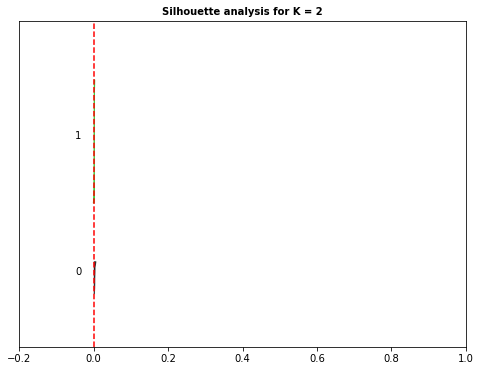

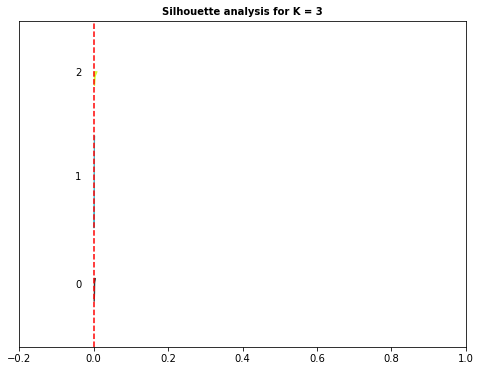

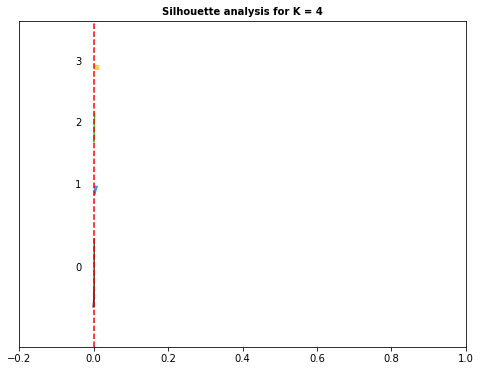

In [231]:
silhouette(kmeans_results, final_df, plot=True)

In [232]:
def get_top_features_cluster(tf_idf_array, prediction, n_feats):
    labels = np.unique(prediction)
    dfs = []
    for label in labels:
        id_temp = np.where(prediction==label) # indices for each cluster
        x_means = np.mean(tf_idf_array[id_temp], axis = 0) # returns average score across cluster
        sorted_means = np.argsort(x_means)[::-1][:n_feats] # indices with top 20 scores
        features = vectorizer.get_feature_names()
        best_features = [(features[i], x_means[i]) for i in sorted_means]
        df = pd.DataFrame(best_features, columns = ['features', 'score'])
        dfs.append(df)
    return dfs

def plotWords(dfs, n_feats):
    plt.figure(figsize=(8, 4))
    for i in range(0, len(dfs)):
        plt.title(("Most Common Words in Cluster {}".format(i)), fontsize=10, fontweight='bold')
        sns.barplot(x = 'score' , y = 'features', orient = 'h' , data = dfs[i][:n_feats])
        plt.show()

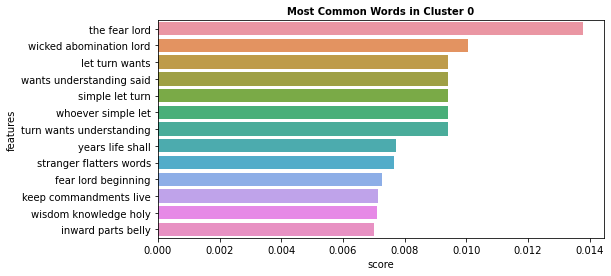

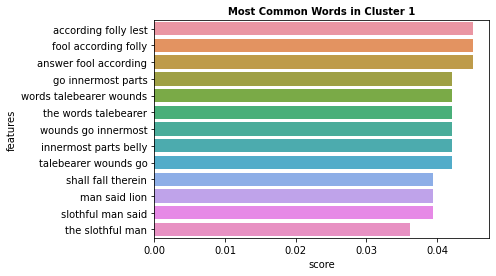

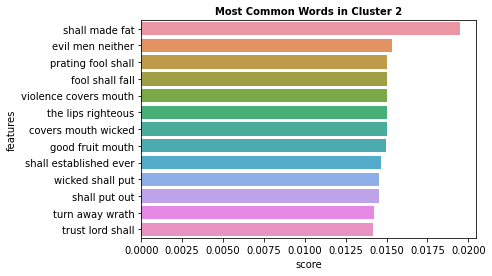

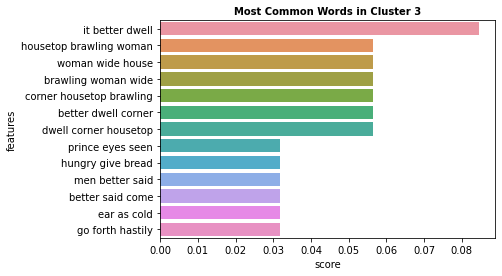

In [233]:
best_result = 4
kmeans = kmeans_results.get(best_result)

final_df_array = final_df.to_numpy()
prediction = kmeans.predict(final_df)
n_feats = 20
dfs = get_top_features_cluster(final_df_array, prediction, n_feats)
plotWords(dfs, 13)

In [234]:
def centroidsDict(centroids, index):
    a = centroids.T[index].sort_values(ascending = False).reset_index().values
    centroid_dict = dict()

    for i in range(0, len(a)):
        centroid_dict.update( {a[i,0] : a[i,1]} )

    return centroid_dict

def generateWordClouds(centroids):
    wordcloud = WordCloud(max_font_size=100, background_color = 'white')
    for i in range(0, len(centroids)):
        centroid_dict = centroidsDict(centroids, i)        
        wordcloud.generate_from_frequencies(centroid_dict)

        plt.figure()
        plt.title('Cluster {}'.format(i))
        plt.imshow(wordcloud)
        plt.axis("off")
        plt.show()

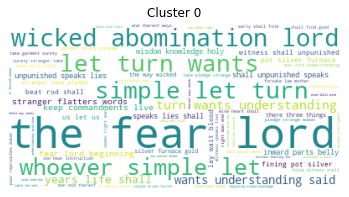

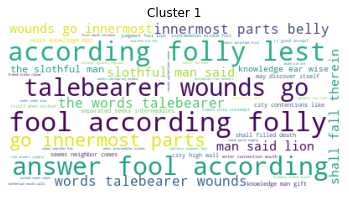

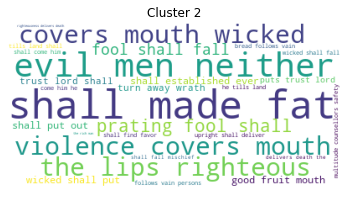

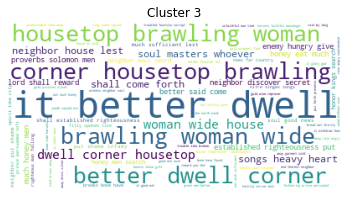

In [235]:
centroids = pd.DataFrame(kmeans.cluster_centers_)
centroids.columns = final_df.columns
generateWordClouds(centroids)

In [236]:
labels = kmeans.labels_ 
df['label'] = labels
df.head()

,Autor,Livro,label
100,Proverbios_1,"'proverbs', 'solomon', 'son', 'david', ',', 'k...",0
101,Proverbios_2,"'son', ',', 'receive', 'words', ',', 'hide', '...",0
102,Proverbios_3,"'son', ',', 'forget', 'law', ';', 'let', 'hear...",2
103,Proverbios_4,"'hear', ',', 'children', ',', 'instruction', '...",0
104,Proverbios_5,"'son', ',', 'attend', 'wisdom', ',', 'bow', 'e...",0


In [237]:
print(df)

             Autor                                              Livro  label
100   Proverbios_1  'proverbs', 'solomon', 'son', 'david', ',', 'k...      0
101   Proverbios_2  'son', ',', 'receive', 'words', ',', 'hide', '...      0
102   Proverbios_3  'son', ',', 'forget', 'law', ';', 'let', 'hear...      2
103   Proverbios_4  'hear', ',', 'children', ',', 'instruction', '...      0
104   Proverbios_5  'son', ',', 'attend', 'wisdom', ',', 'bow', 'e...      0
105   Proverbios_6  'son', ',', 'surety', 'friend', ',', 'stricken...      0
106   Proverbios_7  'son', ',', 'keep', 'words', ',', 'lay', 'comm...      0
107   Proverbios_8  'wisdom', 'cry', '?', 'understanding', 'put', ...      0
108   Proverbios_9  'wisdom', 'built', 'house', ',', 'hewn', 'seve...      0
109  Proverbios_10  'proverbs', 'solomon', '.', 'wise', 'son', 'ma...      2
110  Proverbios_11  'false', 'balance', 'abomination', 'lord', ':'...      2
111  Proverbios_12  'whoever', 'loves', 'instruction', 'loves', 'k...      2